In [68]:
import tensorflow as tf
from scipy import stats
import numpy as np
import pandas as pd
from keras.utils import plot_model
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_array as check_arrays
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.layers import Dense
from keras.layers import LSTM,GRU,Input
import statistics as st
from sklearn.utils import resample
from keras import backend as k
from keras import regularizers
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import math
import random 
%matplotlib inline

In [69]:

train_x_=pd.read_csv("C:\\Users\\Parichya\\Downloads\\norm_kollam_daily\\train_x.csv",header=None)
train_y_=pd.read_csv("C:\\Users\\Parichya\\Downloads\\norm_kollam_daily\\train_y.csv",header=None)
test_x_=pd.read_csv("C:\\Users\\Parichya\\Downloads\\norm_kollam_daily\\test_x.csv",header=None)
test_y_=pd.read_csv("C:\\Users\\Parichya\\Downloads\\norm_kollam_daily\\test_y.csv",header=None)
print(train_x.shape)
print(train_y.shape)
train_=np.append(train_x,train_y,axis=1)
test_=np.append(test_x,test_y,axis=1)

(2440, 5)
(2440, 1)


In [70]:
B=10
def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]
D=partition(train_,B)
D_=partition(test_,B)

In [71]:
print(len(D_[9]))

48


In [72]:
input_=5
hidden=20
epoch=5000
sgd = SGD(lr = 0.2, momentum = 0.0, decay = 0.0, nesterov=False)

In [73]:
def func(dat,t,tes):
    y_hat=[]
    y_hat_tes=[]
    for i in range(0,B):
        tr = dat[i]
        tr_x,tr_y=tr[ : , : -1],tr[ : , -1]
        
        model=Sequential()
        model.add(Dense(hidden,input_dim=input_,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mse',optimizer='sgd')
        
        model.fit(tr_x,tr_y,batch_size=len(tr_y),epochs=epoch,verbose=1,shuffle=False)
        y_hat.append(model.predict(t))
        y_hat_tes.append(model.predict(tes))
        model.reset_states()
        
        
    sum_y=y_hat[0]
    sum_y_tes=y_hat_tes[0]
    for i in range(1,B):
        sum_y+=y_hat[i]
        sum_y_tes+=y_hat_tes[i]
    sum_y=sum_y/B
    sum_y_tes=sum_y_tes/B
    y_hat_=sum_y

    print(sum_y)   
    sigma=[]
    sigma_tes=[]
    for i in range(0,B):
        x=y_hat[i]-y_hat_
        x=x**2
        sigma.append(x)
        x_tes=y_hat_tes[i]-sum_y_tes
        x_tes=x_tes**2
        sigma_tes.append(x_tes)
    sigma_y_squared=sigma[0]
    sigma_tes_sq=sigma_tes[0]
    for i in range(1,B):
        sigma_y_squared+=sigma[i]
        sigma_tes_sq+=sigma_tes[i]
    sigma_y_squared=sigma_y_squared/(B-1)
    sigma_tes_sq=sigma_tes_sq/(B-1)
    return (y_hat_,sigma_y_squared,sum_y_tes,sigma_tes_sq)

        

In [74]:
#print(y_hat[9]+y_hat[8])
y_hat_tr,sigma_train,y_hat_test,sigma_test=func(D,train_x_,test_x_)

#y_hat_test=func(D_,test_x_)

Epoch 1/5000
244/244 [==============================] - 0s 1ms/step - loss: 1.2690
Epoch 2/5000
244/244 [==============================] - 0s 4us/step - loss: 0.9746
Epoch 3/5000
244/244 [==============================] - 0s 4us/step - loss: 0.7494
Epoch 4/5000
244/244 [==============================] - 0s 4us/step - loss: 0.5769
Epoch 5/5000
244/244 [==============================] - 0s 4us/step - loss: 0.4448
Epoch 6/5000
244/244 [==============================] - 0s 8us/step - loss: 0.3437
Epoch 7/5000
244/244 [==============================] - 0s 8us/step - loss: 0.2662
Epoch 8/5000
244/244 [==============================] - 0s 4us/step - loss: 0.2068
Epoch 9/5000
244/244 [==============================] - 0s 4us/step - loss: 0.1613
Epoch 10/5000
244/244 [==============================] - 0s 8us/step - loss: 0.1264
Epoch 11/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0997
Epoch 12/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0792
E

Epoch 99/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 100/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 102/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 103/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 104/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 105/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 106/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 108/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 109/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 110/5000
244/244 [==============================] - 0s 4us/s

Epoch 196/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 197/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 198/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 199/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 200/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 201/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 202/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 204/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 205/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 206/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 207/5000
244/244 [==============================] - 0s 4us/

Epoch 293/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 294/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 295/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 296/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 297/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 298/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 299/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 300/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 301/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 302/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 303/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 304/5000
244/244 [==============================] - 0s 8us/

Epoch 390/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 391/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0118
Epoch 392/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 393/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 394/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 395/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 396/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0118
Epoch 397/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 398/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 399/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 400/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 401/5000
244/244 [==============================] - 0s 4u

Epoch 487/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 488/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 489/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 490/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 491/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 492/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 493/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 494/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 495/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 496/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0118
Epoch 497/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 498/5000
244/244 [==============================] - 0s 4us

244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 584/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 585/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 586/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 587/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0118
Epoch 588/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 589/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 590/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 591/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 592/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 593/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0118
Epoch 594/5000
244/244 [==============================] - 0s 4us/step - loss: 

Epoch 680/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 681/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 682/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 683/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 684/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 685/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 686/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 687/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 688/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 689/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 690/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 691/5000
244/244 [==============================] - 0s 4us/

Epoch 777/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 778/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 779/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 780/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 781/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 782/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 783/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 784/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 785/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 786/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 787/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 788/5000
244/244 [==============================] - 0s 4us/

Epoch 874/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 875/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 876/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 877/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 878/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 879/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 880/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 881/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 882/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 883/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 884/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 885/5000
244/244 [==============================] - 0s 4us/

Epoch 971/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 972/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 973/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 974/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 975/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 976/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 977/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 978/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 979/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 980/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 981/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 982/5000
244/244 [==============================] - 0s 4us/

Epoch 1067/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1068/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1069/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1070/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1071/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1072/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1073/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1074/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1075/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0118
Epoch 1076/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1077/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1078/5000
244/244 [============================

Epoch 1163/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1164/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1165/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1166/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1167/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1168/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1169/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1170/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1171/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1172/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1173/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1174/5000
244/244 [=============================

Epoch 1259/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1260/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1261/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1262/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1263/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1264/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1265/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1266/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1267/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1268/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1269/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1270/5000
244/244 [=============================

Epoch 1355/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1356/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1357/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1358/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1359/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1360/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1361/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1362/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1363/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1364/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1365/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1366/5000
244/244 [=============================

Epoch 1451/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1452/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1453/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0118
Epoch 1454/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1455/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1456/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1457/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1458/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1459/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1460/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1461/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1462/5000
244/244 [============================

Epoch 1547/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1548/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1549/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1550/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1551/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1552/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1553/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1554/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1555/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1556/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1557/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1558/5000
244/244 [=============================

Epoch 1643/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1644/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1645/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1646/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1647/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1648/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0118
Epoch 1649/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1650/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1651/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1652/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1653/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1654/5000
244/244 [============================

Epoch 1739/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1740/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1741/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1742/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1743/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 1744/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1745/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1746/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0118
Epoch 1747/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1748/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1749/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 1750/5000
244/244 [=============================

Epoch 1835/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 1836/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1837/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1838/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1839/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1840/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 1841/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 1842/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1843/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1844/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1845/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1846/5000
244/244 [=============================

Epoch 1931/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 1932/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1933/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1934/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1935/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0117
Epoch 1936/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1937/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1938/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1939/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1940/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 1941/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 1942/5000
244/244 [=============================

Epoch 2027/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2028/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2029/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2030/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2031/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2032/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2033/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2034/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2037/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2038/5000
244/244 [=============================

Epoch 2123/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2124/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2125/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2126/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2127/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2128/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2129/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2130/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2131/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2132/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0117
Epoch 2133/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2134/5000
244/244 [============================

Epoch 2219/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2220/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2221/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2222/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2223/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2224/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2225/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0117
Epoch 2226/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2227/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2228/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2229/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2230/5000
244/244 [============================

Epoch 2315/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2316/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2317/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0117
Epoch 2318/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2319/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2320/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2321/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2322/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2323/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2324/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2325/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2326/5000
244/244 [============================

Epoch 2411/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2412/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2413/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2414/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2415/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2416/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2417/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2418/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2419/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2420/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2421/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2422/5000
244/244 [=============================

Epoch 2507/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2508/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2509/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2510/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0117
Epoch 2511/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2512/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2513/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2514/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2515/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2516/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2517/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2518/5000
244/244 [============================

Epoch 2603/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2604/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2605/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2606/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2608/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2609/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2610/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2611/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2612/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2613/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2614/5000
244/244 [=============================

Epoch 2699/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2700/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2702/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2705/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2706/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2707/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2709/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2710/5000
244/244 [=============================

Epoch 2795/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2796/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0117
Epoch 2797/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2798/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2799/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2800/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2803/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2804/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2805/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2806/5000
244/244 [=============================

Epoch 2891/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2892/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2893/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2894/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2895/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2899/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0117
Epoch 2900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2902/5000
244/244 [=============================

Epoch 2987/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2989/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2990/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2991/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2992/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2993/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0117
Epoch 2994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2995/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 2996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2997/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 2998/5000
244/244 [============================

Epoch 3083/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3084/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3085/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3086/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3087/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3089/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3091/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3092/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3093/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0117
Epoch 3094/5000
244/244 [=============================

Epoch 3179/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3182/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3184/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3185/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3186/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3188/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3189/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3190/5000
244/244 [=============================

Epoch 3275/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3276/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3277/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0117
Epoch 3278/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3280/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3286/5000
244/244 [============================

Epoch 3371/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3372/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3373/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3374/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3375/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3377/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3378/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3379/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0117
Epoch 3380/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0117
Epoch 3381/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3382/5000
244/244 [===========================

244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3467/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3468/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3469/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3470/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3472/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3473/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3474/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3475/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3476/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3477/5000
244/244 [==============================] - 0s 8us/step

Epoch 3562/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3563/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0117
Epoch 3564/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3565/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3566/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3567/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3570/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3571/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3572/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3573/5000
244/244 [============================

Epoch 3658/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3659/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3660/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3661/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3662/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0117
Epoch 3663/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3666/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3667/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3668/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0117
Epoch 3669/5000
244/244 [===========================

Epoch 3754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3756/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3758/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3759/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3760/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3762/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3764/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3765/5000
244/244 [=============================

Epoch 3850/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3852/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3854/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3860/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3861/5000
244/244 [=============================

Epoch 3946/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3947/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3948/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3949/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3950/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3953/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3954/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 3956/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 3957/5000
244/244 [=============================

Epoch 4042/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4045/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4046/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4047/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4050/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4053/5000
244/244 [=============================

Epoch 4138/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4142/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4144/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4149/5000
244/244 [=============================

Epoch 4234/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4235/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4237/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4238/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4240/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4241/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4242/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4243/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4244/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4245/5000
244/244 [=============================

Epoch 4330/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4331/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4333/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4334/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4335/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4340/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4341/5000
244/244 [=============================

Epoch 4426/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4427/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4428/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4429/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4430/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4431/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4433/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4434/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4435/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4437/5000
244/244 [=============================

Epoch 4522/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4523/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4525/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4526/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4527/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4529/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4532/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4533/5000
244/244 [=============================

Epoch 4618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4619/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4620/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4621/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4622/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4623/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4625/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4627/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4628/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4629/5000
244/244 [=============================

Epoch 4714/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4715/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4716/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4719/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4720/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4721/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4722/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4723/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4724/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4725/5000
244/244 [=============================

Epoch 4810/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4811/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4812/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4814/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4815/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4816/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4817/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4818/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4819/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4820/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4821/5000
244/244 [=============================

Epoch 4906/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4907/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4910/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4912/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4913/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 4915/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4916/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0116
Epoch 4917/5000
244/244 [=============================

Epoch 2/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0690
Epoch 3/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0585
Epoch 4/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0504
Epoch 5/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0442
Epoch 6/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0394
Epoch 7/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0357
Epoch 8/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0329
Epoch 9/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0306
Epoch 10/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0290
Epoch 11/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0276
Epoch 12/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0266
Epoch 13/5000
244/244 [==============================] - 0s 4us/step - loss: 0.025

Epoch 100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 102/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 103/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 104/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0229
Epoch 105/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0229
Epoch 106/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0229
Epoch 107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 108/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 109/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0229
Epoch 110/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0229
Epoch 111/5000
244/244 [==============================] - 0s 4us/

Epoch 197/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 198/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0225
Epoch 199/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 200/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 201/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0225
Epoch 202/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0225
Epoch 204/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 205/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0225
Epoch 206/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0225
Epoch 207/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0225
Epoch 208/5000
244/244 [==============================] - 0s 8us/

Epoch 294/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 295/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 296/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 297/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 298/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 299/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 300/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 301/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0222
Epoch 302/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0222
Epoch 303/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0222
Epoch 304/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0222
Epoch 305/5000
244/244 [==============================] - 0s 4us/

Epoch 391/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0219
Epoch 392/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0219
Epoch 393/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0219
Epoch 394/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 395/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0218
Epoch 396/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0218
Epoch 397/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 398/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 399/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 400/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 401/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0218
Epoch 402/5000
244/244 [==============================] - 0s 4us/

Epoch 488/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 489/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0215
Epoch 490/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0215
Epoch 491/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0215
Epoch 492/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0215
Epoch 493/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 494/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 495/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 496/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 497/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 498/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0215
Epoch 499/5000
244/244 [==============================] - 0s 8us/

Epoch 585/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 586/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 587/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 588/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0212
Epoch 589/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 590/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 591/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 592/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0212
Epoch 593/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 594/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 595/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0212
Epoch 596/5000
244/244 [==============================] - 0s 8us/

Epoch 682/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 683/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 684/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 685/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0209
Epoch 686/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0209
Epoch 687/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0209
Epoch 688/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0209
Epoch 689/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0209
Epoch 690/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 691/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 692/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 693/5000
244/244 [==============================] - 0s 4us

Epoch 779/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 780/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0206
Epoch 781/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0206
Epoch 782/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 783/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0206
Epoch 784/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 785/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 786/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 787/5000
244/244 [==============================] - 0s 21us/step - loss: 0.0206
Epoch 788/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0206
Epoch 789/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0206
Epoch 790/5000
244/244 [==============================] - 0s 4

Epoch 876/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 877/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 878/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 879/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 880/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 881/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 882/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 883/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0203
Epoch 884/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0203
Epoch 885/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0203
Epoch 886/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0203
Epoch 887/5000
244/244 [==============================] - 0s 4us/

Epoch 973/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0201
Epoch 974/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0201
Epoch 975/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0201
Epoch 976/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0201
Epoch 977/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0201
Epoch 978/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0201
Epoch 979/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0200
Epoch 980/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0200
Epoch 981/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0200
Epoch 982/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0200
Epoch 983/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0200
Epoch 984/5000
244/244 [==============================] - 0s 8u

Epoch 1069/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1070/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1071/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1072/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 1073/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1074/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1075/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 1076/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 1077/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0198
Epoch 1078/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 1079/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 1080/5000
244/244 [=============================

Epoch 1165/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1166/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1167/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1168/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1169/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0195
Epoch 1170/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1171/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1172/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1173/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1174/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1175/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0195
Epoch 1176/5000
244/244 [=============================

Epoch 1261/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0193
Epoch 1262/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1263/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1264/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0193
Epoch 1265/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1266/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1267/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0193
Epoch 1268/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1269/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 1270/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0193
Epoch 1271/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0193
Epoch 1272/5000
244/244 [=============================

Epoch 1357/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0191
Epoch 1358/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0190
Epoch 1359/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0190
Epoch 1360/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0190
Epoch 1361/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0190
Epoch 1362/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 1363/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 1364/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 1365/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 1366/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0190
Epoch 1367/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0190
Epoch 1368/5000
244/244 [==========================

244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1453/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0188
Epoch 1454/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0188
Epoch 1455/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1456/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1457/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1458/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1459/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1460/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 1461/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0188
Epoch 1462/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0188
Epoch 1463/5000
244/244 [==============================] - 0s 4us/ste

Epoch 1548/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1549/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1550/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1551/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1552/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0186
Epoch 1553/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1554/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1555/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0186
Epoch 1556/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0186
Epoch 1557/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0186
Epoch 1558/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0186
Epoch 1559/5000
244/244 [============================

Epoch 1644/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0184
Epoch 1645/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0184
Epoch 1646/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0184
Epoch 1647/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0184
Epoch 1648/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0184
Epoch 1649/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 1650/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 1651/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 1652/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 1653/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 1654/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 1655/5000
244/244 [============================

Epoch 1740/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1741/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1742/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0181
Epoch 1743/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1744/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1745/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0181
Epoch 1746/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0181
Epoch 1747/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1748/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0181
Epoch 1749/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1750/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 1751/5000
244/244 [=============================

Epoch 1836/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1837/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 1838/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1839/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1840/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1841/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1842/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 1843/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1844/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1845/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1846/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 1847/5000
244/244 [=============================

Epoch 1932/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 1933/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 1934/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1935/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1936/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1937/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1938/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0177
Epoch 1939/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1940/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 1941/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1942/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 1943/5000
244/244 [=============================

Epoch 2028/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2029/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0175
Epoch 2030/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2031/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2032/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2033/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2034/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2037/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2038/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 2039/5000
244/244 [=============================

Epoch 2124/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2125/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2126/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2127/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0173
Epoch 2128/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2129/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2130/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2131/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2132/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2133/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 2135/5000
244/244 [============================

Epoch 2220/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2221/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2222/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2223/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2224/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2225/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0171
Epoch 2226/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0171
Epoch 2227/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0171
Epoch 2228/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0171
Epoch 2229/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2230/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 2231/5000
244/244 [============================

Epoch 2316/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2317/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2318/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2319/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2320/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2321/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2322/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2323/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 2324/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2325/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2326/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 2327/5000
244/244 [=============================

Epoch 2412/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2413/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2414/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2415/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2416/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2417/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 2418/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0167
Epoch 2419/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 2420/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 2421/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 2422/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 2423/5000
244/244 [=============================

Epoch 2508/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 2509/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2510/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2511/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2512/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2513/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2514/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2515/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2516/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 2517/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2518/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 2519/5000
244/244 [=============================

Epoch 2604/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0164
Epoch 2605/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2606/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2608/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2609/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2610/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2611/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2613/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 2615/5000
244/244 [=============================

Epoch 2700/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 2701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2702/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2705/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 2706/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2707/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2709/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2710/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 2711/5000
244/244 [=============================

Epoch 2796/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 2797/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 2798/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 2799/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 2800/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 2801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 2802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 2803/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 2804/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0161
Epoch 2805/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 2806/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 2807/5000
244/244 [============================

Epoch 2892/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2893/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2894/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2895/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 2896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 2902/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 2903/5000
244/244 [=============================

Epoch 2988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2989/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2990/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 2991/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 2992/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 2993/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2995/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2997/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 2998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 2999/5000
244/244 [=============================

Epoch 3084/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 3085/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 3086/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 3087/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3089/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 3090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3092/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3093/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 3094/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 3095/5000
244/244 [=============================

Epoch 3180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3182/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3184/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3185/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3186/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 3188/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0154
Epoch 3189/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0154
Epoch 3190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0154
Epoch 3191/5000
244/244 [=============================

Epoch 3276/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 3277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3278/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 3279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3286/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 3287/5000
244/244 [=============================

Epoch 3372/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 3373/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 3374/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3375/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3377/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3380/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3381/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 3383/5000
244/244 [=============================

Epoch 3468/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3469/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3470/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3472/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3473/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3474/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3475/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3477/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3478/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 3479/5000
244/244 [=============================

Epoch 3564/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3565/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3566/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3567/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3569/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 3570/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 3571/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3572/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 3573/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 3574/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0148
Epoch 3575/5000
244/244 [=============================

Epoch 3660/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 3661/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3662/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3663/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 3664/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3665/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3666/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3667/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3668/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3669/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 3670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 3671/5000
244/244 [=============================

Epoch 3756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3758/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3759/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3760/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3762/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 3763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3764/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3766/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 3767/5000
244/244 [=============================

Epoch 3852/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3854/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 3860/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 3861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 3862/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 3863/5000
244/244 [=============================

Epoch 3948/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3949/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3950/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 3951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3953/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 3954/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3957/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3958/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 3959/5000
244/244 [=============================

Epoch 4044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4045/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 4046/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 4047/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 4048/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 4049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4050/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4053/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 4055/5000
244/244 [=============================

Epoch 4140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4142/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4144/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4149/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4150/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 4151/5000
244/244 [=============================

Epoch 4236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4237/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4238/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 4239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4240/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4242/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 4243/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4244/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 4245/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 4246/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 4247/5000
244/244 [=============================

Epoch 4332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4333/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 4334/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 4335/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 4336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4340/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4341/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 4343/5000
244/244 [=============================

Epoch 4428/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 4429/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4430/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4431/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4432/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 4433/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 4434/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4435/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4437/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 4438/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 4439/5000
244/244 [=============================

Epoch 4524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4525/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4526/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4527/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4529/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4532/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4533/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4534/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4535/5000
244/244 [=============================

Epoch 4620/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4621/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4622/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4623/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4625/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4627/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4628/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4629/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4630/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4631/5000
244/244 [=============================

Epoch 4716/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4719/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4720/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4721/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4722/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4723/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4724/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4725/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4726/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4727/5000
244/244 [=============================

Epoch 4812/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4814/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4815/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4816/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4817/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4818/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4822/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4823/5000
244/244 [=============================

Epoch 4908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4910/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4912/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4913/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4915/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4916/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4917/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4919/5000
244/244 [=============================

Epoch 4/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0268
Epoch 5/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0247
Epoch 6/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0231
Epoch 7/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0219
Epoch 8/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0210
Epoch 9/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0203
Epoch 10/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0198
Epoch 11/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 12/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 13/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 14/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0186
Epoch 15/5000
244/244 [==============================] - 0s 4us/step - loss: 0.01

Epoch 102/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0178
Epoch 103/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0178
Epoch 104/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 105/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 106/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0178
Epoch 108/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 109/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 110/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0178
Epoch 111/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0178
Epoch 112/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0178
Epoch 113/5000
244/244 [==============================] - 0s 4us/

Epoch 199/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 200/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 201/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 202/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 204/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 205/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 206/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 207/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 208/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 209/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 210/5000
244/244 [==============================] - 0s 4us/

Epoch 296/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 297/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 298/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0174
Epoch 299/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 300/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 301/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 302/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 303/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 304/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 305/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 306/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 307/5000
244/244 [==============================] - 0s 4us

Epoch 393/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 394/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 395/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 396/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 397/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0173
Epoch 398/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 399/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0173
Epoch 400/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 401/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0172
Epoch 402/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0172
Epoch 403/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0172
Epoch 404/5000
244/244 [==============================] - 0s 4us/

Epoch 490/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 491/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 492/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 493/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 494/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0171
Epoch 495/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 496/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 497/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 498/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 499/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 500/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 501/5000
244/244 [==============================] - 0s 4us/

Epoch 587/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0169
Epoch 588/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 589/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 590/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 591/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 592/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 593/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 594/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 595/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0169
Epoch 596/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0169
Epoch 597/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0169
Epoch 598/5000
244/244 [==============================] - 0s 8

Epoch 684/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 685/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 686/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0168
Epoch 687/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 688/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0168
Epoch 689/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0168
Epoch 690/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0168
Epoch 691/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0168
Epoch 692/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0167
Epoch 693/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 694/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 695/5000
244/244 [==============================] - 0s 4us/

Epoch 781/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 782/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 783/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 784/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 785/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 786/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 787/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 788/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 789/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 790/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 791/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 792/5000
244/244 [==============================] - 0s 4us/

Epoch 878/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0165
Epoch 879/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0165
Epoch 880/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0165
Epoch 881/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0165
Epoch 882/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0165
Epoch 883/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0165
Epoch 884/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0164
Epoch 885/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 886/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0164
Epoch 887/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0164
Epoch 888/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 889/5000
244/244 [==============================] - 0s 4us/

Epoch 975/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 976/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 977/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 978/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 979/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 980/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 981/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 982/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0163
Epoch 983/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 984/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0163
Epoch 985/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0163
Epoch 986/5000
244/244 [==============================] - 0s 4us/

Epoch 1071/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1072/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 1073/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 1074/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1075/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1076/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1077/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 1078/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1079/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0162
Epoch 1080/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 1081/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0162
Epoch 1082/5000
244/244 [=============================

Epoch 1167/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1168/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1169/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1170/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1171/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1172/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1173/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1174/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1175/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1176/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1178/5000
244/244 [=============================

Epoch 1263/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1264/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1265/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1266/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 1267/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 1268/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1269/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1270/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 1271/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1272/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1273/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1274/5000
244/244 [=============================

Epoch 1359/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1360/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1361/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1362/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1363/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0158
Epoch 1364/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1365/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1366/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1367/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1368/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0158
Epoch 1369/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 1370/5000
244/244 [===========================

Epoch 1455/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1456/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1457/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1458/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1459/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1460/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1461/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1462/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1463/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1464/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1465/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1466/5000
244/244 [=============================

Epoch 1551/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1552/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 1553/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 1554/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1555/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1556/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1557/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1558/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1559/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 1560/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1561/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 1562/5000
244/244 [=============================

Epoch 1647/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1648/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1649/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1650/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1651/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1652/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1653/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1654/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1655/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1656/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1657/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 1658/5000
244/244 [=============================

Epoch 1743/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1744/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1745/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0153
Epoch 1746/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1747/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1748/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1749/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1750/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1751/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1752/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1754/5000
244/244 [============================

Epoch 1839/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1840/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1841/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1842/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1843/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 1844/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 1845/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0152
Epoch 1846/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 1847/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 1848/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1849/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 1850/5000
244/244 [============================

Epoch 1935/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1936/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1937/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 1938/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 1939/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 1940/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1941/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1942/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1943/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1944/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 1945/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 1946/5000
244/244 [=============================

Epoch 2031/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2032/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2033/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2034/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2037/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2038/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2039/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2040/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2041/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2042/5000
244/244 [=============================

Epoch 2127/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2128/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2129/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2130/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0150
Epoch 2131/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2132/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2133/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2135/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2136/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2137/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2138/5000
244/244 [=============================

Epoch 2223/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2224/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2225/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2226/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2227/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2228/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2229/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2230/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2231/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2232/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2233/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2234/5000
244/244 [=============================

Epoch 2319/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0148
Epoch 2320/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2321/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2322/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2323/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0148
Epoch 2324/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0148
Epoch 2325/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2326/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2327/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2328/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0148
Epoch 2329/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0148
Epoch 2330/5000
244/244 [===========================

Epoch 2415/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2416/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2417/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2418/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2419/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2420/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2421/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2422/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2423/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2424/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2425/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2426/5000
244/244 [=============================

Epoch 2511/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2512/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2513/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2514/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2515/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2516/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2517/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2518/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2519/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2520/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2521/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2522/5000
244/244 [=============================

Epoch 2607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2608/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2609/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2610/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2611/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2613/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2615/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2616/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2617/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2618/5000
244/244 [=============================

Epoch 2703/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2705/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2706/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2707/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2709/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2710/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2711/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2712/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2713/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2714/5000
244/244 [=============================

Epoch 2799/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2800/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2803/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2804/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 2805/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 2806/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2808/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2809/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2810/5000
244/244 [=============================

Epoch 2895/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2900/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2901/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2902/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2903/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2904/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2905/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2906/5000
244/244 [=============================

Epoch 2991/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2992/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2993/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2994/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 2995/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0142
Epoch 2996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2997/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2999/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3000/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3001/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3002/5000
244/244 [============================

Epoch 3087/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 3088/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0142
Epoch 3089/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3092/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3093/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 3094/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3095/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3096/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3097/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 3098/5000
244/244 [============================

Epoch 3183/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3184/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3185/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3186/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3187/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3188/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3189/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3191/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3192/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3193/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3194/5000
244/244 [=============================

Epoch 3279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3281/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3282/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3286/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3287/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3288/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3289/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3290/5000
244/244 [=============================

Epoch 3375/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3377/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3380/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3381/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3383/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3384/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3385/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3386/5000
244/244 [=============================

Epoch 3471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3472/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0139
Epoch 3473/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3474/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3475/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3476/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3477/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3478/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3479/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3480/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3481/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3482/5000
244/244 [============================

Epoch 3567/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3569/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0139
Epoch 3570/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3571/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3572/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3573/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0139
Epoch 3574/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3575/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3576/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3577/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3578/5000
244/244 [============================

Epoch 3663/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3666/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3667/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3669/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3671/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3672/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3673/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3674/5000
244/244 [=============================

Epoch 3759/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3760/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3761/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3762/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0138
Epoch 3763/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3764/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3766/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3767/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3768/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3769/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3770/5000
244/244 [============================

Epoch 3855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3860/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3862/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3863/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3864/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3865/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3866/5000
244/244 [=============================

Epoch 3951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3953/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3954/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3957/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3958/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3959/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3960/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3962/5000
244/244 [=============================

Epoch 4047/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4050/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4052/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4053/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4055/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4056/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4057/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4058/5000
244/244 [=============================

Epoch 4143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4144/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4146/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4149/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4150/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4151/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4152/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 4153/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 4154/5000
244/244 [=============================

Epoch 4239/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4240/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4242/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4243/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4244/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4245/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4246/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4247/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4248/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4250/5000
244/244 [=============================

Epoch 4335/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4338/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4339/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4340/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 4341/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4343/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4344/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 4346/5000
244/244 [=============================

Epoch 4431/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4433/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4434/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4435/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4437/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4438/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4439/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4440/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4442/5000
244/244 [=============================

Epoch 4527/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4529/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4532/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4533/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4534/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4535/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4536/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4537/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4538/5000
244/244 [=============================

Epoch 4623/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4625/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4626/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4627/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4628/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4629/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4630/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4631/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4632/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 4633/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 4634/5000
244/244 [=============================

Epoch 4719/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4720/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4721/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4722/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4723/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4724/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4725/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4726/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4727/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 4728/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4729/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4730/5000
244/244 [=============================

Epoch 4815/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4816/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4817/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4818/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4822/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4823/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4824/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4825/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 4826/5000
244/244 [=============================

Epoch 4911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4912/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4913/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4914/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4915/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4916/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4917/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4919/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4920/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4921/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4922/5000
244/244 [=============================

Epoch 7/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0321
Epoch 8/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0275
Epoch 9/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0241
Epoch 10/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0214
Epoch 11/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0193
Epoch 12/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 13/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 14/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 15/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 16/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 17/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 18/5000
244/244 [==============================] - 0s 4us/step - loss: 0.

Epoch 105/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 106/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 108/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 109/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 110/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 111/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 112/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 113/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 114/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 115/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 116/5000
244/244 [==============================] - 0s 4us/

Epoch 202/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 203/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 204/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 205/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 206/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 207/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 208/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 209/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 210/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 211/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 212/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 213/5000
244/244 [==============================] - 0s 8us/

Epoch 299/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 300/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 301/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 302/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 303/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 304/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 305/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 306/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 307/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 308/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 309/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 310/5000
244/244 [==============================] - 0s 4us/

Epoch 396/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 397/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 398/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 399/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 400/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 401/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 402/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 403/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 404/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 405/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 406/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 407/5000
244/244 [==============================] - 0s 4us/

Epoch 493/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 494/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 495/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 496/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 497/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0118
Epoch 498/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 499/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 500/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 501/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 502/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 503/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 504/5000
244/244 [==============================] - 0s 4us

Epoch 590/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 591/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 592/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 593/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 594/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 595/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 596/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 597/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 598/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 599/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 600/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 601/5000
244/244 [==============================] - 0s 4us/

Epoch 687/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 688/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 689/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 690/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 691/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 692/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 693/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 694/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 695/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 696/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0116
Epoch 698/5000
244/244 [==============================] - 0s 4us/

Epoch 784/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 785/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 786/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 787/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0115
Epoch 788/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0115
Epoch 789/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 790/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0115
Epoch 791/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 792/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 793/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 794/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0115
Epoch 795/5000
244/244 [==============================] - 0s 4us/

Epoch 881/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 882/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0114
Epoch 883/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0114
Epoch 884/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 885/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 886/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0114
Epoch 887/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 888/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 889/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 890/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0114
Epoch 891/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0114
Epoch 892/5000
244/244 [==============================] - 0s 4us/

Epoch 978/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 979/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 980/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0113
Epoch 981/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0113
Epoch 982/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 983/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0113
Epoch 984/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0113
Epoch 985/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 986/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 987/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 989/5000
244/244 [==============================] - 0s 4us/

Epoch 1074/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0113
Epoch 1075/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1076/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1077/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1078/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1079/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1080/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1081/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1082/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1083/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1084/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 1085/5000
244/244 [=============================

244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1170/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1171/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1172/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1173/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 1174/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1175/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1176/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1178/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1179/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 1180/5000
244/244 [==============================] - 0s 4us/step

Epoch 1265/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1266/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1267/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1268/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1269/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1270/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1271/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1272/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1273/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 1274/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 1275/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 1276/5000
244/244 [=============================

Epoch 1361/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1362/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1363/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1364/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1365/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1366/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1367/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1368/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1369/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1370/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1371/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1372/5000
244/244 [=============================

Epoch 1457/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1458/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1459/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1460/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1461/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1462/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1463/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1464/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 1465/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1466/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1467/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 1468/5000
244/244 [=============================

Epoch 1553/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1554/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1555/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1556/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1557/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1558/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1559/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1560/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1561/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1562/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1563/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1564/5000
244/244 [=============================

Epoch 1649/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1650/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1651/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1652/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1653/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1654/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1655/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1656/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1657/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1658/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1659/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1660/5000
244/244 [=============================

Epoch 1745/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1746/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1747/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0108
Epoch 1748/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1749/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1750/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1751/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1752/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1756/5000
244/244 [============================

Epoch 1841/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1842/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1843/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1844/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1845/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1846/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1847/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1848/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1849/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1850/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1852/5000
244/244 [=============================

Epoch 1937/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1938/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1939/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1940/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1941/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1942/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1943/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1944/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1945/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1946/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1947/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1948/5000
244/244 [=============================

Epoch 2033/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2034/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2037/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2038/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2039/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2040/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2041/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2042/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2044/5000
244/244 [=============================

Epoch 2129/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2130/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2131/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2132/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2133/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2135/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2136/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2137/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2138/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2140/5000
244/244 [=============================

Epoch 2225/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2226/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2227/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2228/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2229/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2230/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2231/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2232/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2233/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2234/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2235/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2236/5000
244/244 [=============================

Epoch 2321/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2322/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2323/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2324/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2325/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2326/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2327/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2328/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2329/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2330/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2331/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2332/5000
244/244 [=============================

Epoch 2417/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2418/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2419/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0104
Epoch 2420/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2421/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2422/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2423/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2424/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2425/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2426/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2427/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2428/5000
244/244 [============================

Epoch 2513/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2514/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0103
Epoch 2515/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0103
Epoch 2516/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2517/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2518/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2519/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2520/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0103
Epoch 2521/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2522/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2523/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2524/5000
244/244 [==========================

Epoch 2609/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2610/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2611/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2613/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2615/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2616/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2617/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2619/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2620/5000
244/244 [=============================

Epoch 2705/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2706/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2707/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2709/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2710/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2711/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2712/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2713/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2714/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2715/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2716/5000
244/244 [=============================

Epoch 2801/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2803/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2804/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2805/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2806/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2807/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2808/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2809/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2810/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2811/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2812/5000
244/244 [=============================

Epoch 2897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2899/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2902/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 2903/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2904/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2905/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 2906/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 2907/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2908/5000
244/244 [=============================

Epoch 2993/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2995/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2997/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 2998/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 2999/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3000/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3001/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3002/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3003/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3004/5000
244/244 [=============================

Epoch 3089/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3092/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3093/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0101
Epoch 3094/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3095/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3096/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3097/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3098/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3099/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3100/5000
244/244 [============================

Epoch 3185/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3186/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3188/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3189/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3191/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3192/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3193/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3194/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3195/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3196/5000
244/244 [=============================

Epoch 3281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3286/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3287/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3288/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3289/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3290/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3291/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3292/5000
244/244 [=============================

Epoch 3377/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3380/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3381/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3383/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3384/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3385/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3386/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3387/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3388/5000
244/244 [=============================

Epoch 3473/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3474/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3475/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3477/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3478/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3479/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3480/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3481/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3482/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3483/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3484/5000
244/244 [=============================

Epoch 3569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3570/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3571/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3572/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3573/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3574/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3575/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3576/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 3577/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3578/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3579/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 3580/5000
244/244 [=============================

244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3666/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3667/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3669/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3671/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3672/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3673/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3674/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3675/5000
244/244 [==============================] - 0s 4us/step

Epoch 3760/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3762/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3764/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3766/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3767/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3768/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3769/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3770/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3771/5000
244/244 [=============================

Epoch 3856/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3857/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3858/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3859/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 3860/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3862/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3863/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3864/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3865/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3866/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 3867/5000
244/244 [=============================

Epoch 3952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3953/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3954/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3957/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 3958/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 3959/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3960/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 3962/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 3963/5000
244/244 [=============================

Epoch 4048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4049/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4050/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4053/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4055/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4056/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0097
Epoch 4057/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4058/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4059/5000
244/244 [============================

Epoch 4144/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4149/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4150/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4151/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4152/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4153/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 4154/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 4155/5000
244/244 [=============================

Epoch 4240/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 4241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4242/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 4243/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4244/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4245/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4246/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4247/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4248/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4250/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4251/5000
244/244 [=============================

Epoch 4336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4340/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 4341/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4343/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4344/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4346/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4347/5000
244/244 [=============================

Epoch 4432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4433/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 4434/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4435/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4437/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4438/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4439/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4440/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4442/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4443/5000
244/244 [=============================

Epoch 4528/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4529/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 4532/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4533/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4534/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4535/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4536/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4537/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4538/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4539/5000
244/244 [=============================

Epoch 4624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4625/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4626/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4627/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4628/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4629/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4630/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0095
Epoch 4631/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4632/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4633/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4634/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4635/5000
244/244 [============================

Epoch 4720/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4721/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4722/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4723/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4724/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4725/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4726/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4727/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4728/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4729/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4730/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4731/5000
244/244 [=============================

Epoch 4816/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4817/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4818/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4822/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4823/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4824/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 4825/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4826/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 4827/5000
244/244 [=============================

Epoch 4912/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4913/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 4914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4915/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4916/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4917/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4919/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 4920/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 4921/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 4922/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 4923/5000
244/244 [=============================

Epoch 8/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0919
Epoch 9/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0733
Epoch 10/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0589
Epoch 11/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0479
Epoch 12/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0395
Epoch 13/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0329
Epoch 14/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0279
Epoch 15/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0241
Epoch 16/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0211
Epoch 17/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0188
Epoch 18/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 19/5000
244/244 [==============================] - 0s 4us/step - loss: 

Epoch 106/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 107/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 108/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 109/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 110/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0112
Epoch 111/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 112/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 113/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 114/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 115/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 116/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 117/5000
244/244 [==============================] - 0s 4us

Epoch 203/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 204/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 205/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 206/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 207/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 208/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 209/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 210/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 211/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 212/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 213/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 214/5000
244/244 [==============================] - 0s 4us/

Epoch 300/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 301/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 302/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 303/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0112
Epoch 304/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 305/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 306/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 307/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 308/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 309/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 310/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 311/5000
244/244 [==============================] - 0s 4us/

Epoch 397/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 398/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 399/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 400/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 401/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 402/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 403/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0111
Epoch 404/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 405/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 406/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 407/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 408/5000
244/244 [==============================] - 0s 8us/

Epoch 494/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 495/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 496/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 497/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 498/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 499/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 500/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 501/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 502/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 503/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0111
Epoch 504/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0111
Epoch 505/5000
244/244 [==============================] - 0s 4us/

Epoch 591/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0110
Epoch 592/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 593/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 594/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 595/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 596/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 597/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0110
Epoch 598/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 599/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0110
Epoch 600/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 601/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 602/5000
244/244 [==============================] - 0s 4u

Epoch 688/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 689/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 690/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 691/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 692/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 693/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 694/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 695/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 696/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 698/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 699/5000
244/244 [==============================] - 0s 4us/

Epoch 785/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 786/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 787/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 788/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 789/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 790/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 791/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 792/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 793/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 794/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0110
Epoch 795/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0110
Epoch 796/5000
244/244 [==============================] - 0s 4us/

Epoch 882/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 883/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 884/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 885/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 886/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 887/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 888/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 889/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 890/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 891/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 892/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 893/5000
244/244 [==============================] - 0s 8us/

Epoch 979/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 980/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 981/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 982/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 983/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 984/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 985/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 986/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 987/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 989/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 990/5000
244/244 [==============================] - 0s 4us/

Epoch 1075/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1076/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1077/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1078/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1079/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1080/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1081/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1082/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1083/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0109
Epoch 1084/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1085/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0109
Epoch 1086/5000
244/244 [=============================

Epoch 1171/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1172/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1173/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1174/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1175/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1176/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1178/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1179/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1181/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1182/5000
244/244 [=============================

Epoch 1267/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1268/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1269/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1270/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1271/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1272/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1273/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1274/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1275/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1276/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1278/5000
244/244 [=============================

Epoch 1363/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1364/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1365/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1366/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1367/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1368/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1369/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0108
Epoch 1370/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1371/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1372/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1373/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0108
Epoch 1374/5000
244/244 [=============================

Epoch 1459/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1460/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1461/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1462/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1463/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1464/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1465/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1466/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1467/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1468/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1469/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1470/5000
244/244 [=============================

Epoch 1555/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1556/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1557/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1558/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1559/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1560/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1561/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1562/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1563/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1564/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1565/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1566/5000
244/244 [=============================

Epoch 1651/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1652/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1653/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1654/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1655/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1656/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1657/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1658/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1659/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1660/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1661/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1662/5000
244/244 [=============================

Epoch 1747/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1748/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1749/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1750/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1751/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1752/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 1758/5000
244/244 [=============================

Epoch 1843/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1844/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1845/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1846/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1847/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1848/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1849/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1850/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1852/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1853/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1854/5000
244/244 [=============================

Epoch 1939/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1940/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1941/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1942/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1943/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1944/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1945/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1946/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1947/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1948/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 1949/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 1950/5000
244/244 [=============================

Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2037/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2038/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2039/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2040/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2041/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2042/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 2043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2045/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0106
Epoch 2046/5000
244/244 [=============================

Epoch 2131/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2132/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2133/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2135/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2136/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2137/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2138/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2142/5000
244/244 [=============================

Epoch 2227/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2228/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2229/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2230/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2231/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2232/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2233/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2234/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2235/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2237/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2238/5000
244/244 [=============================

Epoch 2323/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2324/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2325/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2326/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2327/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2328/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2329/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2330/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2331/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2333/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2334/5000
244/244 [=============================

Epoch 2419/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2420/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2421/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2422/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 2423/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2424/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2425/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2426/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2427/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2428/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2429/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0105
Epoch 2430/5000
244/244 [=============================

Epoch 2515/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2516/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2517/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2518/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2519/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2520/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2521/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2522/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2523/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2525/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2526/5000
244/244 [=============================

Epoch 2611/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2613/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2615/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2616/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2617/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2619/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2620/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2621/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2622/5000
244/244 [=============================

Epoch 2707/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0104
Epoch 2708/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2709/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2710/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0104
Epoch 2711/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2712/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2713/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2714/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 2715/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0104
Epoch 2716/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2717/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0104
Epoch 2718/5000
244/244 [==========================

Epoch 2803/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2804/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2805/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2806/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2808/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2809/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2810/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2811/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2812/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2813/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2814/5000
244/244 [=============================

Epoch 2899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2902/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2903/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0103
Epoch 2904/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2905/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2906/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2907/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2909/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 2910/5000
244/244 [============================

Epoch 2995/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2997/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 2999/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3000/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0103
Epoch 3001/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 3002/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3003/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3004/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3005/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3006/5000
244/244 [============================

Epoch 3091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3092/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 3093/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3094/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3095/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 3096/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3097/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3098/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 3099/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0103
Epoch 3100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 3102/5000
244/244 [=============================

Epoch 3187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3188/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3189/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3190/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3191/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3192/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3193/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3194/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3195/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3196/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0102
Epoch 3197/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3198/5000
244/244 [============================

Epoch 3283/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3286/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3287/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3288/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3289/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3290/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3291/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3292/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3293/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3294/5000
244/244 [=============================

Epoch 3379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3380/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3381/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3383/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3384/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3385/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3386/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3387/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3388/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3389/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3390/5000
244/244 [=============================

Epoch 3475/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3477/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3478/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3479/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3480/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3481/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3482/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3483/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3484/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 3485/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 3486/5000
244/244 [=============================

Epoch 3571/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3572/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3573/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3574/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3575/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3576/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3577/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3578/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0101
Epoch 3579/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3580/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3581/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3582/5000
244/244 [============================

Epoch 3667/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3669/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3671/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3672/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3673/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3674/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3675/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3676/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3677/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3678/5000
244/244 [=============================

Epoch 3763/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3764/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3766/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3767/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3768/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3769/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3770/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3771/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3772/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3773/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3774/5000
244/244 [=============================

Epoch 3859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3860/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3862/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3863/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3864/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3865/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3866/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3867/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3868/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0101
Epoch 3869/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3870/5000
244/244 [=============================

Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0101
Epoch 3956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3957/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3958/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3959/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3960/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3962/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3963/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3964/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 3965/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 3966/5000
244/244 [=============================

Epoch 4051/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4053/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4054/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4055/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4056/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4057/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4058/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4059/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4060/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4061/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4062/5000
244/244 [=============================

Epoch 4147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4149/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4150/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4151/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4152/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4153/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4154/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4155/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4156/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4157/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4158/5000
244/244 [=============================

Epoch 4243/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4244/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4245/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4246/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4247/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4248/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4250/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4251/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4252/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4253/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4254/5000
244/244 [=============================

Epoch 4339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4340/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 4341/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4342/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0100
Epoch 4343/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4344/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4346/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4347/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4348/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4349/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 4350/5000
244/244 [============================

Epoch 4435/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4436/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4437/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4438/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0099
Epoch 4439/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4440/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4442/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4443/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0099
Epoch 4444/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4445/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4446/5000
244/244 [===========================

Epoch 4531/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4532/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4533/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4534/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4535/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4536/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4537/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4538/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0099
Epoch 4539/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4540/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4541/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4542/5000
244/244 [============================

Epoch 4627/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4628/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4629/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4630/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4631/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4632/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4633/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4634/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4635/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4636/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0099
Epoch 4637/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4638/5000
244/244 [============================

Epoch 4723/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4724/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4725/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4726/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4727/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4728/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4729/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4730/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4731/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4732/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4733/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4734/5000
244/244 [=============================

Epoch 4819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4822/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 4823/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 4824/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4825/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4826/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4827/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4828/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4829/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4830/5000
244/244 [=============================

Epoch 4915/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 4916/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 4917/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4919/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4920/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4921/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4922/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4923/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4924/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4925/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 4926/5000
244/244 [=============================

Epoch 11/5000
244/244 [==============================] - 0s 12us/step - loss: 0.2227
Epoch 12/5000
244/244 [==============================] - 0s 8us/step - loss: 0.1745
Epoch 13/5000
244/244 [==============================] - 0s 4us/step - loss: 0.1372
Epoch 14/5000
244/244 [==============================] - 0s 4us/step - loss: 0.1084
Epoch 15/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0861
Epoch 16/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0689
Epoch 17/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0555
Epoch 18/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0452
Epoch 19/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0372
Epoch 20/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0311
Epoch 21/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0263
Epoch 22/5000
244/244 [==============================] - 0s 4us/step - loss

Epoch 109/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 110/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 111/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 112/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 113/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 114/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 115/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 116/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 117/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 118/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 119/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 120/5000
244/244 [==============================] - 0s 4us/

Epoch 206/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 207/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 208/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 209/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 210/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 211/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 212/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 213/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 214/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 215/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 216/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 217/5000
244/244 [==============================] - 0s 8us/

Epoch 303/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 304/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 305/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 306/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 307/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 308/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 309/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 310/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 311/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 312/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 313/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 314/5000
244/244 [==============================] - 0s 8us/

Epoch 400/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 401/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 402/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 403/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 404/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 405/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0098
Epoch 406/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 407/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 408/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 409/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 410/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 411/5000
244/244 [==============================] - 0s 4us

Epoch 497/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 498/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 499/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 500/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 501/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 502/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 503/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 504/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 505/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 506/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 507/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 508/5000
244/244 [==============================] - 0s 4us/

Epoch 594/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 595/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 596/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 597/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 598/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 599/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 600/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 601/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 602/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 603/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 604/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 605/5000
244/244 [==============================] - 0s 8us/

Epoch 691/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 692/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 693/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 694/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 695/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 696/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 698/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 699/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 700/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 702/5000
244/244 [==============================] - 0s 4us/

Epoch 788/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 789/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 790/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 791/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 792/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 793/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 794/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 795/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 796/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 797/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 798/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 799/5000
244/244 [==============================] - 0s 8us/

Epoch 885/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 886/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 887/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 888/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 889/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 890/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 891/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 892/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 893/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 894/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 895/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0097
Epoch 896/5000
244/244 [==============================] - 0s 8us

Epoch 982/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 983/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 984/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 985/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 986/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 987/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 988/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0097
Epoch 989/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 990/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 991/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 992/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 993/5000
244/244 [==============================] - 0s 8us

Epoch 1078/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1079/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1080/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1081/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1082/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1083/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1084/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1085/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1086/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1087/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1089/5000
244/244 [============================

Epoch 1174/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1175/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1176/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1178/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1179/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1180/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1182/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1184/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1185/5000
244/244 [=============================

Epoch 1270/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1271/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1272/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1273/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1274/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1275/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1276/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1278/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1281/5000
244/244 [=============================

Epoch 1366/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1367/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1368/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1369/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1370/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1371/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1372/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1373/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1374/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1375/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1377/5000
244/244 [=============================

Epoch 1462/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1463/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1464/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1465/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1466/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1467/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1468/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1469/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1470/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1472/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1473/5000
244/244 [=============================

Epoch 1558/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1559/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1560/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1561/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1562/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1563/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1564/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1565/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1566/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1567/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1569/5000
244/244 [=============================

Epoch 1654/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1655/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1656/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1657/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1658/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1659/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1660/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1661/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1662/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1663/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1665/5000
244/244 [=============================

Epoch 1750/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1751/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1752/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1758/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1759/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1760/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1761/5000
244/244 [=============================

Epoch 1846/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0095
Epoch 1847/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1848/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1849/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1850/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1852/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1854/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1857/5000
244/244 [============================

Epoch 1942/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1943/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1944/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 1945/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1946/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1947/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1948/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1949/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1950/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1953/5000
244/244 [============================

Epoch 2038/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2039/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2040/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2041/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2042/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2044/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2045/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2046/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2047/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2048/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2049/5000
244/244 [=============================

Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2135/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2136/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2137/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2138/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0094
Epoch 2139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2142/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2143/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2144/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2145/5000
244/244 [=============================

Epoch 2230/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2231/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2232/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2233/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2234/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2235/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2237/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2238/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2240/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2241/5000
244/244 [=============================

Epoch 2326/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2327/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2328/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2329/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2330/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2331/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2332/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0094
Epoch 2333/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2334/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2335/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2336/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2337/5000
244/244 [============================

Epoch 2422/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2423/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2424/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2425/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2426/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2427/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2428/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2429/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2430/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2431/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2433/5000
244/244 [=============================

Epoch 2518/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2519/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2520/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2521/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2522/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2523/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2525/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2526/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2527/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2529/5000
244/244 [=============================

Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2615/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2616/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2617/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2619/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2620/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2621/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2622/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2623/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2625/5000
244/244 [=============================

Epoch 2710/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2711/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2712/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2713/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2714/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2715/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2716/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2719/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2720/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2721/5000
244/244 [=============================

Epoch 2806/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2808/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2809/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2810/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2811/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2812/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2814/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2815/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2816/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2817/5000
244/244 [=============================

Epoch 2902/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2903/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2904/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2905/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2906/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2907/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2910/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2912/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2913/5000
244/244 [=============================

Epoch 2998/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2999/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3000/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3001/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3002/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3003/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3004/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3005/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3006/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3007/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3008/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3009/5000
244/244 [=============================

Epoch 3094/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3095/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3096/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3097/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3098/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3099/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3102/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3103/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3104/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3105/5000
244/244 [=============================

Epoch 3190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3191/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3192/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3193/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3194/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3195/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3196/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3197/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3198/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3199/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3200/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3201/5000
244/244 [=============================

Epoch 3286/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3287/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3288/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3289/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3290/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3291/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3292/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3293/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3294/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3295/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3296/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3297/5000
244/244 [=============================

Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3383/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3384/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3385/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3386/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3387/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3388/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3389/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3390/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3391/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3392/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3393/5000
244/244 [=============================

Epoch 3478/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3479/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3480/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3481/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3482/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3483/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3484/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3485/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3486/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3487/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3488/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3489/5000
244/244 [=============================

Epoch 3574/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3575/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3576/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3577/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3578/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3579/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3580/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3581/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3582/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3583/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3584/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3585/5000
244/244 [=============================

Epoch 3670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3671/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3672/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3673/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3674/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3675/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3676/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3677/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3678/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3679/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3680/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3681/5000
244/244 [=============================

Epoch 3766/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3767/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3768/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3769/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3770/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3771/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3772/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3773/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3774/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3775/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3776/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3777/5000
244/244 [=============================

Epoch 3862/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3863/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3864/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3865/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3866/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3867/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3868/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3869/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0091
Epoch 3870/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3871/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3872/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3873/5000
244/244 [============================

Epoch 3958/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3959/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0091
Epoch 3960/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3962/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3963/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3964/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3965/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3966/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3967/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3968/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3969/5000
244/244 [=============================

Epoch 4054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4055/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4056/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4057/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4058/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4059/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4060/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4061/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4062/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4063/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0091
Epoch 4064/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4065/5000
244/244 [============================

Epoch 4150/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4151/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 4152/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4153/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4154/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4155/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4156/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4157/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4158/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4159/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 4160/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4161/5000
244/244 [===========================

Epoch 4246/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4247/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4248/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4250/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4251/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4252/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4253/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4254/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4255/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4256/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4257/5000
244/244 [=============================

Epoch 4342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4343/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4344/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4346/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4347/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4348/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4349/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 4350/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4351/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4352/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 4353/5000
244/244 [=============================

Epoch 4438/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4439/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4440/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4442/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4443/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4444/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4445/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4446/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4447/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4448/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4449/5000
244/244 [=============================

Epoch 4534/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4535/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4536/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4537/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4538/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4539/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4540/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4541/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4542/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4543/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4544/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4545/5000
244/244 [=============================

Epoch 4630/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4631/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4632/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4633/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4634/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4635/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4636/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4637/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4638/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4639/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4640/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4641/5000
244/244 [=============================

Epoch 4726/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4727/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4728/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4729/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4730/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4731/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4732/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4733/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4734/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4735/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4736/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4737/5000
244/244 [=============================

Epoch 4822/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4823/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4824/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4825/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0090
Epoch 4826/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4827/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4828/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4829/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4830/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4831/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4832/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4833/5000
244/244 [============================

Epoch 4918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4919/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4920/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4921/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4922/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4923/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4924/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4925/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4926/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4927/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4928/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4929/5000
244/244 [=============================

Epoch 14/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0226
Epoch 15/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0217
Epoch 16/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0209
Epoch 17/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0204
Epoch 18/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0200
Epoch 19/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0196
Epoch 20/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0194
Epoch 21/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0192
Epoch 22/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0190
Epoch 23/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0189
Epoch 24/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0188
Epoch 25/5000
244/244 [==============================] - 0s 4us/step - loss

Epoch 112/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 113/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 114/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 115/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 116/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 117/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 118/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 119/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 120/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0183
Epoch 121/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 122/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0183
Epoch 123/5000
244/244 [==============================] - 0s 4us/

Epoch 209/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 210/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 211/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 212/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 213/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 214/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0181
Epoch 215/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 216/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 217/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 218/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 219/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0181
Epoch 220/5000
244/244 [==============================] - 0s 8us/

Epoch 306/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 307/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 308/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 309/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 310/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 311/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 312/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 313/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 314/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 315/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0179
Epoch 316/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0179
Epoch 317/5000
244/244 [==============================] - 0s 8us/

Epoch 403/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 404/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 405/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 406/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 407/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 408/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 409/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 410/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 411/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0177
Epoch 412/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 413/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0177
Epoch 414/5000
244/244 [==============================] - 0s 8us/

Epoch 500/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 501/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 502/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 503/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 504/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 505/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 506/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0176
Epoch 507/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 508/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 509/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0176
Epoch 510/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0175
Epoch 511/5000
244/244 [==============================] - 0s 4us/

Epoch 597/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0174
Epoch 598/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0174
Epoch 599/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 600/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 601/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 602/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0174
Epoch 603/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 604/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 605/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 606/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0174
Epoch 607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0174
Epoch 608/5000
244/244 [==============================] - 0s 4us/

Epoch 694/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 695/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 696/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 698/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 699/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 700/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 702/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0172
Epoch 705/5000
244/244 [==============================] - 0s 8us/

Epoch 791/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 792/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0171
Epoch 793/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 794/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0170
Epoch 795/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 796/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 797/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0170
Epoch 798/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 799/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 800/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0170
Epoch 802/5000
244/244 [==============================] - 0s 4us/

Epoch 888/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 889/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 890/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 891/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 892/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 893/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 894/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 895/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 896/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 897/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0169
Epoch 898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0169
Epoch 899/5000
244/244 [==============================] - 0s 4us/

Epoch 985/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 986/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0167
Epoch 987/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0167
Epoch 988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 989/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 990/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 991/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 992/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 993/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0167
Epoch 995/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0167
Epoch 996/5000
244/244 [==============================] - 0s 20us

Epoch 1081/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1082/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1083/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1084/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1085/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 1086/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1087/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0166
Epoch 1089/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 1090/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 1091/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0166
Epoch 1092/5000
244/244 [============================

Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1178/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1179/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1182/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1184/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0164
Epoch 1185/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1186/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0164
Epoch 1187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0164
Epoch 1188/5000
244/244 [=============================

Epoch 1273/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1274/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1275/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1276/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1278/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0163
Epoch 1284/5000
244/244 [=============================

Epoch 1369/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1370/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1371/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1372/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0161
Epoch 1373/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1374/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1375/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1377/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0161
Epoch 1380/5000
244/244 [=============================

Epoch 1465/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1466/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1467/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1468/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1469/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1470/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1471/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1472/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1473/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0160
Epoch 1474/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1475/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0160
Epoch 1476/5000
244/244 [=============================

Epoch 1561/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1562/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1563/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1564/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0159
Epoch 1565/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0159
Epoch 1566/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1567/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1570/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1571/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0158
Epoch 1572/5000
244/244 [=============================

Epoch 1657/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1658/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1659/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1660/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1661/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1662/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1663/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 1664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1666/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1667/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0157
Epoch 1668/5000
244/244 [=============================

Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1758/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1759/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0156
Epoch 1760/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0156
Epoch 1761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1762/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0156
Epoch 1764/5000
244/244 [============================

Epoch 1849/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1850/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1852/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1854/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0155
Epoch 1855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 1859/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0154
Epoch 1860/5000
244/244 [=============================

Epoch 1945/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1946/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1947/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1948/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1949/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1950/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1952/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0153
Epoch 1953/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1954/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0153
Epoch 1956/5000
244/244 [=============================

Epoch 2041/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2042/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2045/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2046/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 2047/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0152
Epoch 2048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2050/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 2052/5000
244/244 [=============================

Epoch 2137/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2138/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 2139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2142/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2144/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 2148/5000
244/244 [=============================

Epoch 2233/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2234/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2235/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0150
Epoch 2236/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0150
Epoch 2237/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0150
Epoch 2238/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2240/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2242/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0150
Epoch 2243/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 2244/5000
244/244 [=============================

Epoch 2329/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2330/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2331/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2333/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2334/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2335/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2336/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2337/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 2338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 2340/5000
244/244 [=============================

Epoch 2425/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0148
Epoch 2426/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0148
Epoch 2427/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2428/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2429/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2430/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2431/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2433/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 2434/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2435/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 2436/5000
244/244 [=============================

Epoch 2521/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2522/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2523/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2524/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2525/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2526/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 2527/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2528/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2529/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 2532/5000
244/244 [=============================

Epoch 2617/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 2618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2619/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2620/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2621/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2622/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2623/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2625/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0145
Epoch 2626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2627/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 2628/5000
244/244 [=============================

Epoch 2713/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2714/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2715/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 2716/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2719/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2720/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2721/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2722/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2723/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 2724/5000
244/244 [=============================

Epoch 2809/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2810/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2811/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2812/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 2814/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2815/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2816/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2817/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2818/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2819/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 2820/5000
244/244 [=============================

Epoch 2905/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2906/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 2907/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2910/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2912/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2913/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2915/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 2916/5000
244/244 [=============================

Epoch 3001/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3002/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3003/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3004/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3005/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3006/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 3007/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3008/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3009/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3010/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3011/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 3012/5000
244/244 [=============================

Epoch 3097/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3098/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3099/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0140
Epoch 3100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3102/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3103/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3104/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 3105/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3106/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 3108/5000
244/244 [============================

Epoch 3193/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3194/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 3195/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3196/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3197/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3198/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3199/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3200/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3201/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3202/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3204/5000
244/244 [=============================

Epoch 3289/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3290/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 3291/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3292/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3293/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3294/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3295/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3296/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3297/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3298/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3299/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3300/5000
244/244 [=============================

Epoch 3385/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3386/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3387/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3388/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3389/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3390/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3391/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3392/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3393/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3394/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 3395/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 3396/5000
244/244 [=============================

Epoch 3481/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0137
Epoch 3482/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3483/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3484/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3485/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3486/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3487/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3488/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3489/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3490/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 3491/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 3492/5000
244/244 [============================

Epoch 3577/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 3578/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3579/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3580/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 3581/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3582/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3583/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3584/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 3585/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 3586/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 3587/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 3588/5000
244/244 [=============================

Epoch 3673/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3674/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3675/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3676/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 3677/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 3678/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 3679/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3680/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3681/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3682/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3683/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 3684/5000
244/244 [=============================

Epoch 3769/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3770/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 3771/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3772/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 3773/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3774/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3775/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3776/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0134
Epoch 3777/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3778/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3779/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 3780/5000
244/244 [=============================

Epoch 3865/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3866/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3867/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3868/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3869/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3870/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3871/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3872/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3873/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3874/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3875/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3876/5000
244/244 [=============================

Epoch 3961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3962/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3963/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3964/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3965/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 3966/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3967/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3968/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0133
Epoch 3969/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3970/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3971/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 3972/5000
244/244 [============================

Epoch 4057/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4058/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4059/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4060/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4061/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4062/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4063/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4064/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4065/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4066/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 4067/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 4068/5000
244/244 [=============================

Epoch 4153/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 4154/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4155/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4156/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4157/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4158/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 4159/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 4160/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 4161/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 4162/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4163/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 4164/5000
244/244 [=============================

Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4250/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4251/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4252/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4253/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4254/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4255/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4256/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4257/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4258/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4259/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4260/5000
244/244 [=============================

Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4346/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4347/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4348/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4349/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4350/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4351/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4352/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4353/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4354/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 4355/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 4356/5000
244/244 [=============================

Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4442/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0129
Epoch 4443/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4444/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4445/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4446/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4447/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4448/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4449/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 4450/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 4451/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 4452/5000
244/244 [=============================

Epoch 4537/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4538/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4539/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4540/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4541/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4542/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4543/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4544/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4545/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4546/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4547/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4548/5000
244/244 [=============================

Epoch 4633/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4634/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4635/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4636/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4637/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 4638/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4639/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4640/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 4641/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 4642/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 4643/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 4644/5000
244/244 [=============================

Epoch 4729/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 4730/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 4731/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4732/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4733/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4734/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4735/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4736/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4737/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4738/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 4739/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 4740/5000
244/244 [=============================

Epoch 4825/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4826/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4827/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4828/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4829/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4830/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4831/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4832/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4833/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4834/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4835/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4836/5000
244/244 [=============================

Epoch 4921/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4922/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4923/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4924/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4925/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4926/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4927/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4928/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4929/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4930/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 4931/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 4932/5000
244/244 [=============================

Epoch 17/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 18/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0113
Epoch 19/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0107
Epoch 20/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0102
Epoch 21/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 22/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 23/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 24/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 25/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 26/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0088
Epoch 27/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0088
Epoch 28/5000
244/244 [==============================] - 0s 4us/step - loss:

Epoch 115/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 116/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 117/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 118/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 119/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 120/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 121/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 122/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 123/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 124/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 125/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 126/5000
244/244 [==============================] - 0s 8us/

Epoch 212/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 213/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 214/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 215/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 216/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 217/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 218/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 219/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 220/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0085
Epoch 221/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 222/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0085
Epoch 223/5000
244/244 [==============================] - 0s 4us/

Epoch 309/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 310/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 311/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 312/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 313/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 314/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 315/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 316/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 317/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 318/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 319/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 320/5000
244/244 [==============================] - 0s 4us/

Epoch 406/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 407/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 408/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 409/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 410/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 411/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 412/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 413/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 414/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 415/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 416/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 417/5000
244/244 [==============================] - 0s 4us/

Epoch 503/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 504/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 505/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 506/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 507/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0084
Epoch 508/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 509/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 510/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 511/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 512/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 513/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 514/5000
244/244 [==============================] - 0s 4us

Epoch 600/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 601/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 602/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 603/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 604/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 605/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 606/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 608/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 609/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 610/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 611/5000
244/244 [==============================] - 0s 4us/

Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 698/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 699/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 700/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 702/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 705/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 706/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 707/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 708/5000
244/244 [==============================] - 0s 8us/

Epoch 794/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 795/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 796/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 797/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 798/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 799/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 800/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 803/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 804/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 805/5000
244/244 [==============================] - 0s 4us/

Epoch 891/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 892/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 893/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 894/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 895/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 902/5000
244/244 [==============================] - 0s 8us/

Epoch 988/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 989/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 990/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 991/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 992/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 993/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 995/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 996/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 997/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 999/5000
244/244 [==============================] - 0s 4us/

Epoch 1084/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1085/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1086/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 1087/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 1088/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1089/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 1091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 1092/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1093/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0084
Epoch 1094/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0084
Epoch 1095/5000
244/244 [=============================

Epoch 1180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1182/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1184/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1185/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1186/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1187/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1188/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1189/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1191/5000
244/244 [=============================

Epoch 1276/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1278/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1279/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1280/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1281/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1282/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1286/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1287/5000
244/244 [=============================

Epoch 1372/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1373/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1374/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1375/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1377/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1380/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1381/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1383/5000
244/244 [=============================

Epoch 1468/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1469/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1470/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1472/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1473/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1474/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1475/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1477/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1478/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1479/5000
244/244 [=============================

Epoch 1564/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1565/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1566/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1567/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1568/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1570/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1571/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1572/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1573/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1574/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1575/5000
244/244 [=============================

Epoch 1660/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1661/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1662/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1663/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1666/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1667/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1669/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1671/5000
244/244 [=============================

Epoch 1756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1758/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1759/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1760/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1762/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1764/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1766/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1767/5000
244/244 [=============================

Epoch 1852/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1854/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1860/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1862/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1863/5000
244/244 [=============================

Epoch 1948/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1949/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1950/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1952/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0083
Epoch 1953/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1954/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1955/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 1956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1957/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1958/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 1959/5000
244/244 [=============================

Epoch 2044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2045/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2046/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2047/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2050/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2053/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2055/5000
244/244 [=============================

Epoch 2140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2141/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2142/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2144/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2148/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2149/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2150/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2151/5000
244/244 [=============================

Epoch 2236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2237/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2238/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2240/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2242/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2243/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2244/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 2245/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2246/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0083
Epoch 2247/5000
244/244 [=============================

Epoch 2332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2333/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2334/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2335/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2339/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2340/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2341/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2343/5000
244/244 [=============================

Epoch 2428/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2429/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2430/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2431/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2433/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2434/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2435/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2437/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2438/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0082
Epoch 2439/5000
244/244 [=============================

Epoch 2524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2525/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2526/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2527/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2529/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2531/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2532/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2533/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2534/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2535/5000
244/244 [=============================

Epoch 2620/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2621/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2622/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2623/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2624/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2625/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2627/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2628/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2629/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2630/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2631/5000
244/244 [=============================

Epoch 2716/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2719/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2720/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2721/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2722/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2723/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2724/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2725/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2726/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2727/5000
244/244 [=============================

Epoch 2812/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2814/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2815/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2816/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2817/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2818/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2822/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2823/5000
244/244 [=============================

Epoch 2908/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2909/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2910/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2912/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2913/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2915/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2916/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2917/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 2918/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 2919/5000
244/244 [=============================

Epoch 3004/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3005/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0082
Epoch 3006/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3007/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3008/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3009/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3010/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3011/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3012/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3013/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3014/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3015/5000
244/244 [============================

Epoch 3100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3101/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3102/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3103/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3104/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3105/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3106/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3107/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3108/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3109/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3110/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3111/5000
244/244 [=============================

Epoch 3196/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3197/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3198/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3199/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3200/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3201/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3202/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3204/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3205/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3206/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3207/5000
244/244 [=============================

Epoch 3292/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3293/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3294/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3295/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3296/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3297/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3298/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3299/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3300/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3301/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3302/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3303/5000
244/244 [=============================

Epoch 3388/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3389/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3390/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3391/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3392/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3393/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3394/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3395/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3396/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3397/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3398/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3399/5000
244/244 [=============================

Epoch 3484/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3485/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3486/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3487/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3488/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3489/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3490/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3491/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3492/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3493/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3494/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3495/5000
244/244 [=============================

Epoch 3580/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3581/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3582/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3583/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3584/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3585/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3586/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3587/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3588/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3589/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0082
Epoch 3590/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3591/5000
244/244 [=============================

Epoch 3676/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3677/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0082
Epoch 3678/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0081
Epoch 3679/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3680/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3681/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0081
Epoch 3682/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0081
Epoch 3683/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3684/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3685/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3686/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3687/5000
244/244 [==========================

Epoch 3772/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3773/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3774/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3775/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3776/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3777/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3778/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3779/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3780/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3781/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3782/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3783/5000
244/244 [=============================

Epoch 3868/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3869/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3870/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3871/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3872/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3873/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3874/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3875/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3876/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3877/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3878/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3879/5000
244/244 [=============================

Epoch 3964/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3965/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3966/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3967/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3968/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3969/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3970/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 3971/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3972/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0081
Epoch 3973/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3974/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 3975/5000
244/244 [============================

Epoch 4060/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4061/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4062/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4063/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4064/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4065/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4066/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4067/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4068/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4069/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4070/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0081
Epoch 4071/5000
244/244 [============================

Epoch 4156/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4157/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4158/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4159/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4160/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4161/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4162/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4163/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4164/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4165/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4166/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4167/5000
244/244 [=============================

Epoch 4252/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4253/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4254/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4255/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4256/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4257/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4258/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4259/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4260/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4261/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4262/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4263/5000
244/244 [=============================

Epoch 4348/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4349/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4350/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4351/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4352/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4353/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4354/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4355/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4356/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4357/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4358/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4359/5000
244/244 [=============================

Epoch 4444/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4445/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4446/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4447/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4448/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4449/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4450/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4451/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4452/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4453/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4454/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4455/5000
244/244 [=============================

Epoch 4540/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4541/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4542/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4543/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4544/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4545/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4546/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4547/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4548/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4549/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4550/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4551/5000
244/244 [=============================

Epoch 4636/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4637/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4638/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4639/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4640/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4641/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4642/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4643/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4644/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4645/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4646/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4647/5000
244/244 [=============================

Epoch 4732/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0081
Epoch 4733/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4734/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4735/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4736/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4737/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4738/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4739/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4740/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4741/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4742/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4743/5000
244/244 [============================

Epoch 4828/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4829/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4830/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4831/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4832/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4833/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4834/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4835/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4836/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4837/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4838/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4839/5000
244/244 [=============================

Epoch 4924/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4925/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4926/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4927/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4928/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4929/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4930/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4931/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4932/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4933/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0081
Epoch 4934/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0081
Epoch 4935/5000
244/244 [=============================

Epoch 20/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0157
Epoch 21/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0155
Epoch 22/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0154
Epoch 23/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0152
Epoch 24/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0151
Epoch 25/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0151
Epoch 26/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0150
Epoch 27/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 28/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0149
Epoch 29/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 30/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0149
Epoch 31/5000
244/244 [==============================] - 0s 4us/step - loss:

Epoch 118/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 119/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 120/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 121/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 122/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 123/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0147
Epoch 124/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 125/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 126/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 127/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0147
Epoch 128/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0147
Epoch 129/5000
244/244 [==============================] - 0s 4us

Epoch 215/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 216/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 217/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 218/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 219/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 220/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0146
Epoch 221/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 222/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 223/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 224/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0146
Epoch 225/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0146
Epoch 226/5000
244/244 [==============================] - 0s 8us

Epoch 312/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 313/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0145
Epoch 314/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 315/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 316/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 317/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 318/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 319/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 320/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0145
Epoch 321/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 322/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0145
Epoch 323/5000
244/244 [==============================] - 0s 16u

Epoch 409/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 410/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 411/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 412/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 413/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 414/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 415/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 416/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 417/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0144
Epoch 418/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 419/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0144
Epoch 420/5000
244/244 [==============================] - 0s 8us/

Epoch 506/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 507/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 508/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 509/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0143
Epoch 510/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 511/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 512/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 513/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 514/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 515/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0143
Epoch 516/5000
244/244 [==============================] - 0s 0us/step - loss: 0.0143
Epoch 517/5000
244/244 [==============================] - 0s 4us/

Epoch 603/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 604/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 605/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0142
Epoch 606/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 607/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 608/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 609/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 610/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 611/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 613/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0142
Epoch 614/5000
244/244 [==============================] - 0s 4us/

Epoch 700/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 701/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 702/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 705/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 706/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0141
Epoch 707/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 709/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 710/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0141
Epoch 711/5000
244/244 [==============================] - 0s 4us/

Epoch 797/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 798/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 799/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 800/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 802/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 803/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 804/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0140
Epoch 805/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 806/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0140
Epoch 808/5000
244/244 [==============================] - 0s 4us/

Epoch 894/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 895/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 896/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0139
Epoch 897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 901/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 902/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 903/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 904/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0139
Epoch 905/5000
244/244 [==============================] - 0s 4us/

Epoch 991/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 992/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 993/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 995/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 996/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 997/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 999/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 1000/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 1001/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0138
Epoch 1002/5000
244/244 [==============================] - 0s 1

Epoch 1087/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0138
Epoch 1088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1089/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1090/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1091/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1092/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1093/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1094/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 1095/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 1096/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 1097/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 1098/5000
244/244 [=============================

Epoch 1183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1184/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1185/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1186/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0137
Epoch 1187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1188/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1189/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1190/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1191/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1192/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1193/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0137
Epoch 1194/5000
244/244 [=============================

Epoch 1279/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 1280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1283/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0136
Epoch 1284/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1285/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1286/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1287/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1288/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1289/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0136
Epoch 1290/5000
244/244 [=============================

Epoch 1375/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 1376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1377/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1379/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1380/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 1381/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 1382/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0135
Epoch 1383/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1384/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1385/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0135
Epoch 1386/5000
244/244 [=============================

Epoch 1471/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1472/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1473/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1474/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1475/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1477/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1478/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1479/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1480/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1481/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1482/5000
244/244 [=============================

Epoch 1567/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1568/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1570/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1571/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1572/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1573/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0134
Epoch 1574/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1575/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0134
Epoch 1576/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1577/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0134
Epoch 1578/5000
244/244 [============================

Epoch 1663/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 1664/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0133
Epoch 1665/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1666/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1667/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1669/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1670/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1671/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1672/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0133
Epoch 1673/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0133
Epoch 1674/5000
244/244 [============================

Epoch 1759/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1760/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1761/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1762/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1763/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1764/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1765/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1766/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1767/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1768/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1769/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0132
Epoch 1770/5000
244/244 [============================

Epoch 1855/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1856/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1857/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1858/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1860/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1861/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1862/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0132
Epoch 1863/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0132
Epoch 1864/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1865/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0132
Epoch 1866/5000
244/244 [============================

Epoch 1951/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1952/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1953/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 1954/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 1955/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 1956/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1957/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1958/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1959/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1960/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0131
Epoch 1961/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0131
Epoch 1962/5000
244/244 [=============================

Epoch 2047/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2048/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2049/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2050/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 2051/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2052/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2053/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2054/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2055/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2056/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2057/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 2058/5000
244/244 [=============================

Epoch 2143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2144/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2146/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 2147/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2148/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0130
Epoch 2149/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2150/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2151/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2152/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2153/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0130
Epoch 2154/5000
244/244 [=============================

Epoch 2239/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 2240/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 2242/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2243/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2244/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2245/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 2246/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2247/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 2248/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 2249/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0129
Epoch 2250/5000
244/244 [============================

Epoch 2335/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0129
Epoch 2336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2337/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2338/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2339/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2340/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2341/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2342/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2343/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2344/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2345/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2346/5000
244/244 [=============================

Epoch 2431/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0128
Epoch 2432/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2433/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2434/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0128
Epoch 2435/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0128
Epoch 2436/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2437/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0128
Epoch 2438/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2439/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2440/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0128
Epoch 2442/5000
244/244 [==========================

244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2527/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2528/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2529/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2530/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2531/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2532/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0127
Epoch 2533/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2534/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2535/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2536/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2537/5000
244/244 [==============================] - 0s 8us/ste

Epoch 2622/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 2623/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2624/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2625/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 2627/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2628/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2629/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0127
Epoch 2630/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0127
Epoch 2631/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 2632/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0127
Epoch 2633/5000
244/244 [============================

Epoch 2717/5000
244/244 [==============================] - 0s 37us/step - loss: 0.0126
Epoch 2718/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0126
Epoch 2719/5000
244/244 [==============================] - 0s 33us/step - loss: 0.0126
Epoch 2720/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0126
Epoch 2721/5000
244/244 [==============================] - 0s 24us/step - loss: 0.0126
Epoch 2722/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2723/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0126
Epoch 2724/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2725/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2726/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2727/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2728/5000
244/244 [=======================

244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2814/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2815/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2816/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0126
Epoch 2817/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0126
Epoch 2818/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2819/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2820/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2821/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0126
Epoch 2822/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0126
Epoch 2823/5000
244/244 [==============================] - 0s 8us/st

Epoch 2908/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 2909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 2910/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0125
Epoch 2911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 2912/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 2913/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 2914/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 2915/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 2916/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 2917/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 2918/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 2919/5000
244/244 [============================

244/244 [==============================] - 0s 12us/step - loss: 0.0125
Epoch 3004/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0125
Epoch 3005/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3006/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3007/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3008/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3009/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 3010/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3011/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0125
Epoch 3012/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0125
Epoch 3013/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0125
Epoch 3014/5000
244/244 [==============================] - 0s 4us/s

Epoch 3099/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3100/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3101/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3102/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0124
Epoch 3103/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3104/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3105/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0124
Epoch 3106/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0124
Epoch 3107/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3108/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3109/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3110/5000
244/244 [==========================

244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3195/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3196/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3197/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3198/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3199/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3200/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3201/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3202/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3203/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0124
Epoch 3204/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0124
Epoch 3205/5000
244/244 [==============================] - 0s 8us/step

Epoch 3290/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3291/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3292/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3293/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3294/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3295/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3296/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3297/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3298/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3299/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3300/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3301/5000
244/244 [=============================

244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3386/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3387/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3388/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0123
Epoch 3389/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3390/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3391/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0123
Epoch 3392/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3393/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0123
Epoch 3394/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3395/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0123
Epoch 3396/5000
244/244 [==============================] - 0s 4us/st

Epoch 3481/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3482/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3483/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3484/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3485/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3486/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3487/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3488/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3489/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3490/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3491/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3492/5000
244/244 [=============================

Epoch 3577/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0122
Epoch 3578/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0122
Epoch 3579/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3580/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3581/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3582/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3583/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3584/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3585/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3586/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3587/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3588/5000
244/244 [===========================

Epoch 3673/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3674/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0122
Epoch 3675/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3676/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3677/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3678/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3679/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3680/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3681/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3682/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0122
Epoch 3683/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0122
Epoch 3684/5000
244/244 [============================

244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3769/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3770/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3771/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3772/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3773/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3774/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3775/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0121
Epoch 3776/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0121
Epoch 3777/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3778/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3779/5000
244/244 [==============================] - 0s 20us/s

Epoch 3864/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3865/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3866/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3867/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3868/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3869/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3870/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3871/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0121
Epoch 3872/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3873/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0121
Epoch 3874/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0121
Epoch 3875/5000
244/244 [============================

244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 3960/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 3961/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0120
Epoch 3962/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 3963/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 3964/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 3965/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 3966/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 3967/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 3968/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 3969/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 3970/5000
244/244 [==============================] - 0s 4us/ste

Epoch 4055/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4056/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4057/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0120
Epoch 4058/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0120
Epoch 4059/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4060/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4061/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4062/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4063/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4064/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4065/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4066/5000
244/244 [===========================

Epoch 4151/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4152/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4153/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0120
Epoch 4154/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4155/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4156/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4157/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4158/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4159/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4160/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4161/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0120
Epoch 4162/5000
244/244 [=============================

Epoch 4247/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4248/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4249/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4250/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4251/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4252/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4253/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4254/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4255/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4256/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4257/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4258/5000
244/244 [=============================

Epoch 4343/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4344/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4345/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4346/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4347/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4348/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4349/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4350/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4351/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4352/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4353/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4354/5000
244/244 [=============================

Epoch 4439/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4440/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4441/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4442/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4443/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4444/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0119
Epoch 4445/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0119
Epoch 4446/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4447/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4448/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4449/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4450/5000
244/244 [=============================

Epoch 4535/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4536/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4537/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4538/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4539/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4540/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4541/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4542/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4543/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4544/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4545/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4546/5000
244/244 [=============================

Epoch 4631/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4632/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4633/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4634/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4635/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4636/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4637/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4638/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4639/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4640/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4641/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0118
Epoch 4642/5000
244/244 [=============================

Epoch 4727/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4728/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0118
Epoch 4729/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4730/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4731/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4732/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4733/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4734/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4735/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4736/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4737/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0117
Epoch 4738/5000
244/244 [============================

Epoch 4823/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4824/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4825/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4826/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4827/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4828/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4829/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4830/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4831/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4832/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4833/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4834/5000
244/244 [=============================

Epoch 4919/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4920/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4921/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4922/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4923/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4924/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4925/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4926/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4927/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0117
Epoch 4928/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4929/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0117
Epoch 4930/5000
244/244 [=============================

Epoch 15/5000
244/244 [==============================] - 0s 29us/step - loss: 0.0116
Epoch 16/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0112
Epoch 17/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0110
Epoch 18/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0107
Epoch 19/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0106
Epoch 20/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0105
Epoch 21/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0104
Epoch 22/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0103
Epoch 23/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 24/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 25/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0102
Epoch 26/5000
244/244 [==============================] - 0s 4us/step - los

Epoch 113/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 114/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0100
Epoch 115/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 116/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 117/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 118/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 119/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0100
Epoch 120/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0100
Epoch 121/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 122/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 123/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 124/5000
244/244 [==============================] - 0s 4

Epoch 210/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 211/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 212/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 213/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 214/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 215/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 216/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 217/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 218/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0100
Epoch 219/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0100
Epoch 220/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0100
Epoch 221/5000
244/244 [==============================] - 0s 4us

Epoch 307/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 308/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 309/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 310/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0099
Epoch 311/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 312/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 313/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 314/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 315/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 316/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 317/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 318/5000
244/244 [==============================] - 0s 8us

244/244 [==============================] - 0s 12us/step - loss: 0.0099
Epoch 404/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 405/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 406/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 407/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 408/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 409/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 410/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 411/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 412/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 413/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 414/5000
244/244 [==============================] - 0s 4us/step - loss: 0

Epoch 500/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 501/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 502/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0099
Epoch 503/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 504/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 505/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 506/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 507/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0099
Epoch 508/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 509/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 510/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0099
Epoch 511/5000
244/244 [==============================] - 0s 4us

Epoch 597/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 598/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 599/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 600/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 601/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 602/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 603/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 604/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 605/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 606/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0098
Epoch 607/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0098
Epoch 608/5000
244/244 [==============================] - 0s 12

Epoch 694/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 695/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 696/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 697/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 698/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 699/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 700/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0098
Epoch 701/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 702/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 704/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 705/5000
244/244 [==============================] - 0s 4us

244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 791/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 792/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 793/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0098
Epoch 794/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 795/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0098
Epoch 796/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 797/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0098
Epoch 798/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 799/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0098
Epoch 800/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0098
Epoch 801/5000
244/244 [==============================] - 0s 4us/step - loss:

Epoch 887/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 888/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 889/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0097
Epoch 890/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0097
Epoch 891/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 892/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 893/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0097
Epoch 894/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 895/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 898/5000
244/244 [==============================] - 0s 1

Epoch 984/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 985/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 986/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 987/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 988/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 989/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0097
Epoch 990/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 991/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 992/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 993/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 994/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0097
Epoch 995/5000
244/244 [==============================] - 0s 4u

Epoch 1080/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 1081/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 1082/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 1083/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0097
Epoch 1084/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 1085/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 1086/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 1087/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 1088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0097
Epoch 1089/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0097
Epoch 1090/5000
244/244 [==============================] - 0s 21us/step - loss: 0.0097
Epoch 1091/5000
244/244 [===========================

244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1176/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1177/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1178/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1179/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1180/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1181/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1182/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1183/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1184/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1185/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1186/5000
244/244 [==============================] - 0s 4us/st

Epoch 1271/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1272/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1273/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1274/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1275/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1276/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1277/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1278/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1279/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0096
Epoch 1280/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1282/5000
244/244 [===========================

244/244 [==============================] - 0s 25us/step - loss: 0.0096
Epoch 1367/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1368/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1369/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1370/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1371/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1372/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1373/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1374/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1375/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1376/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1377/5000
244/244 [==============================] - 0s 4us/st

Epoch 1462/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1463/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1464/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1465/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1466/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1467/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1468/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1469/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0096
Epoch 1470/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1471/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0096
Epoch 1472/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0096
Epoch 1473/5000
244/244 [============================

244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1558/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1559/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1560/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0095
Epoch 1561/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1562/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1563/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1564/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0095
Epoch 1565/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1566/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1567/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1568/5000
244/244 [==============================] - 0s 4us/st

244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1653/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0095
Epoch 1654/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1655/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1656/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1657/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1658/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0095
Epoch 1659/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1660/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1661/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1662/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1663/5000
244/244 [==============================] - 0s 8us/st

Epoch 1748/5000
244/244 [==============================] - 0s 20us/step - loss: 0.0095
Epoch 1749/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1750/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0095
Epoch 1751/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1752/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0095
Epoch 1753/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1754/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1755/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1756/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1757/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1758/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1759/5000
244/244 [==========================

Epoch 1844/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1845/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1846/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0095
Epoch 1847/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1848/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1849/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1850/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1851/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 1852/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0095
Epoch 1853/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1854/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0095
Epoch 1855/5000
244/244 [===========================

244/244 [==============================] - 0s 25us/step - loss: 0.0094
Epoch 1940/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1941/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1942/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1943/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1944/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1945/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 1946/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1947/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1948/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 1949/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 1950/5000
244/244 [==============================] - 0s 12us/s

Epoch 2035/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2036/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2037/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2038/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2039/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2040/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2041/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 2042/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2043/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2044/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2045/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2046/5000
244/244 [============================

244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 2131/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0094
Epoch 2132/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2133/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2134/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2135/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2136/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 2137/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2138/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2141/5000
244/244 [==============================] - 0s 8us/s

Epoch 2226/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 2227/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2228/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2229/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2230/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2231/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2232/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0094
Epoch 2233/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2234/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2235/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0094
Epoch 2236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0094
Epoch 2237/5000
244/244 [===========================

Epoch 2321/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2322/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2323/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2324/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2325/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2326/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2327/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2328/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2329/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2330/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2331/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2332/5000
244/244 [==========================

244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2417/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2418/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2419/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2420/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2421/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2422/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2423/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2424/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0093
Epoch 2425/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2426/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2427/5000
244/244 [==============================] - 0s 8us/s

Epoch 2512/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2513/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2514/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0093
Epoch 2515/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2516/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2517/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2518/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2519/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2520/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2521/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2522/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2523/5000
244/244 [============================

244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2608/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2609/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0093
Epoch 2610/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2611/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2612/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2613/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2614/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2615/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2616/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2617/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2618/5000
244/244 [==============================] - 0s 12us/st

Epoch 2703/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2704/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2705/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2706/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2707/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2708/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2709/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2710/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2711/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0093
Epoch 2712/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2713/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0093
Epoch 2714/5000
244/244 [=============================

244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2799/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0092
Epoch 2800/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0092
Epoch 2801/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2802/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2803/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2804/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2805/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2806/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2808/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0092
Epoch 2809/5000
244/244 [==============================] - 0s 4us/s

Epoch 2894/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2895/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2896/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2897/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2898/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2899/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2900/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2901/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2902/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2903/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2904/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2905/5000
244/244 [=============================

Epoch 2990/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2991/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0092
Epoch 2992/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2993/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2994/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 2995/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2996/5000
244/244 [==============================] - 0s 29us/step - loss: 0.0092
Epoch 2997/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2998/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 2999/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3000/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0092
Epoch 3001/5000
244/244 [==========================

Epoch 3086/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3087/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3088/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3089/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3090/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3091/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3092/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3093/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3094/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3095/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0092
Epoch 3096/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3097/5000
244/244 [============================

244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3182/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3183/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3184/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3185/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3186/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3187/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3188/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3189/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3190/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3191/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3192/5000
244/244 [==============================] - 0s 12us/ste

Epoch 3277/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3278/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3279/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3280/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3281/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3282/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3283/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3284/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0092
Epoch 3285/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3286/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0092
Epoch 3287/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0092
Epoch 3288/5000
244/244 [============================

Epoch 3372/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3373/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3374/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3375/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0091
Epoch 3376/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3377/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3378/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3379/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3380/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3381/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3382/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3383/5000
244/244 [===========================

244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3468/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3469/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3470/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3471/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3472/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3473/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3474/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3475/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3476/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3477/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3478/5000
244/244 [==============================] - 0s 4us/ste

Epoch 3563/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3564/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3565/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3566/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3567/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3568/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3569/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3570/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3571/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3572/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0091
Epoch 3573/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3574/5000
244/244 [===========================

244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3659/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3660/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3661/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3662/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0091
Epoch 3663/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3664/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3665/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3666/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3667/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3668/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3669/5000
244/244 [==============================] - 0s 4us/st

Epoch 3754/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3755/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3756/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3757/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3758/5000
244/244 [==============================] - 0s 25us/step - loss: 0.0091
Epoch 3759/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3760/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3761/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3762/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3763/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3764/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3765/5000
244/244 [===========================

244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3850/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3851/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0091
Epoch 3852/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3853/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3854/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3855/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3856/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0091
Epoch 3857/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3858/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0091
Epoch 3859/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0091
Epoch 3860/5000
244/244 [==============================] - 0s 4us/st

Epoch 3945/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 3946/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3947/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3948/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3949/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3950/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3951/5000
244/244 [==============================] - 0s 29us/step - loss: 0.0090
Epoch 3952/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3953/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 3954/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 3955/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 3956/5000
244/244 [============================

Epoch 4041/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4042/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4043/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4044/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4045/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4046/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4047/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4048/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4049/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4050/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4051/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4052/5000
244/244 [===========================

Epoch 4137/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4138/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4139/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4140/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4141/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4142/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4143/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4144/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4145/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4146/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4147/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4148/5000
244/244 [============================

244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4233/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4234/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4235/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4236/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4237/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4238/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4239/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4240/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4241/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4242/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4243/5000
244/244 [==============================] - 0s 8us/st

Epoch 4328/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4329/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4330/5000
244/244 [==============================] - 0s 16us/step - loss: 0.0090
Epoch 4331/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4332/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4333/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4334/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4335/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4336/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4337/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4338/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4339/5000
244/244 [=========================

Epoch 4424/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4425/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4426/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4427/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4428/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4429/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4430/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4431/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4432/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4433/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4434/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4435/5000
244/244 [============================

Epoch 4520/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4521/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4522/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4523/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4524/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4525/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4526/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4527/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4528/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4529/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4530/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4531/5000
244/244 [=============================

Epoch 4616/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4617/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4618/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4619/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4620/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4621/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4622/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4623/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4624/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0090
Epoch 4625/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0090
Epoch 4626/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 4627/5000
244/244 [==========================

244/244 [==============================] - 0s 12us/step - loss: 0.0089
Epoch 4712/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4713/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4714/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4715/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4716/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4717/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4718/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4719/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4720/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4721/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4722/5000
244/244 [==============================] - 0s 4us/ste

Epoch 4807/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4808/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4809/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4810/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4811/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4812/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4813/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4814/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4815/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4816/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4817/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4818/5000
244/244 [=============================

244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4903/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4904/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4905/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4906/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4907/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0089
Epoch 4908/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4909/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4910/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4911/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4912/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
Epoch 4913/5000
244/244 [==============================] - 0s 4us/ste

Epoch 4998/5000
244/244 [==============================] - 0s 4us/step - loss: 0.0089
Epoch 4999/5000
244/244 [==============================] - 0s 12us/step - loss: 0.0089
Epoch 5000/5000
244/244 [==============================] - 0s 8us/step - loss: 0.0089
[[0.04853495]
 [0.0885793 ]
 [0.09110418]
 ...
 [0.05078311]
 [0.05293791]
 [0.06968862]]


In [75]:

print((sigma_test))

[[0.04419932]
 [0.03882502]
 [0.02853456]
 [0.01988267]
 [0.02014706]
 [0.02138064]
 [0.02355943]
 [0.02266123]
 [0.07132532]
 [0.04771341]
 [0.06350888]
 [0.04338966]
 [0.03621849]
 [0.05697633]
 [0.05599286]
 [0.04527942]
 [0.03222077]
 [0.02163472]
 [0.02062514]
 [0.02161383]
 [0.02195119]
 [0.02159537]
 [0.02167484]
 [0.02357916]
 [0.05629103]
 [0.04830028]
 [0.0466661 ]
 [0.02934057]
 [0.02129143]
 [0.02586795]
 [0.0357721 ]
 [0.0336684 ]
 [0.03668635]
 [0.03347167]
 [0.05143844]
 [0.06466998]
 [0.05136532]
 [0.03904495]
 [0.02314324]
 [0.02893613]
 [0.02657421]
 [0.02765631]
 [0.02339148]
 [0.02071743]
 [0.03495873]
 [0.03131992]
 [0.04702604]
 [0.0375811 ]
 [0.11166249]
 [0.09788872]
 [0.14670716]
 [0.08462713]
 [0.07193875]
 [0.04041221]
 [0.03249427]
 [0.02474395]
 [0.02233606]
 [0.02497185]
 [0.02844258]
 [0.03205166]
 [0.0296241 ]
 [0.02828351]
 [0.02494969]
 [0.02290984]
 [0.02303979]
 [0.03562277]
 [0.03116833]
 [0.0323097 ]
 [0.02630067]
 [0.02503023]
 [0.04947265]
 [0.05

In [76]:

print(len(train_x_))

2440


In [77]:
def z_(dt,y_h,sig):
    dt=np.asarray(dt)
    dt=dt.reshape(-1,1)
    z=(dt-y_h)**2-sig
    for i in range(len(dt)):
        z[i]=max(z[i],0)
    return (z)
r_tr=z_(train_y_,y_hat_tr,sigma_train)
#r_tes=z_(test_y_,y_h_tes,sig_sq_tes)
#print(r_tes)

In [78]:
def custom_loss(y_true, y_pred):
    
    loss=tf.reduce_mean((y_true/y_pred)+tf.math.log(y_pred))
    
    return loss


In [79]:
model2=Sequential()
model2.add(Dense(hidden,input_dim=input_,activation='sigmoid'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss=custom_loss,optimizer='sgd')

model2.summary()
history=model2.fit(train_x_,r_tr,batch_size=len(r_tr),epochs=epoch,verbose=1,shuffle=False)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 21        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
2440/2440 [==============================] - 0s 161us/step - loss: -1.2236
Epoch 2/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 3/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 4/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 5/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 6/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 7/5000
2440/2440 [==================

Epoch 90/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6028
Epoch 91/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6026
Epoch 92/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6025
Epoch 93/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6024
Epoch 94/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6022
Epoch 95/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6021
Epoch 96/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6020
Epoch 97/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6018
Epoch 98/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6017
Epoch 99/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6016
Epoch 100/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.6015
Epoch 101/5000
2440/2440 [===========================

Epoch 185/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5907
Epoch 186/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5906
Epoch 187/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5904
Epoch 188/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5903
Epoch 189/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5902
Epoch 190/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5901
Epoch 191/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5899
Epoch 192/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5898
Epoch 193/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5897
Epoch 194/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5896
Epoch 195/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5894
Epoch 196/5000
2440/2440 [=================

2440/2440 [==============================] - 0s 2us/step - loss: 3.5785
Epoch 280/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5784
Epoch 281/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5783
Epoch 282/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5781
Epoch 283/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5780
Epoch 284/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5779
Epoch 285/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5777
Epoch 286/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5776
Epoch 287/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5775
Epoch 288/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5774
Epoch 289/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5772
Epoch 290/5000
2440/2440 [==============================] 

Epoch 374/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5659
Epoch 375/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5658
Epoch 376/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5657
Epoch 377/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5655
Epoch 378/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5654
Epoch 379/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5653
Epoch 380/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5652
Epoch 381/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5650
Epoch 382/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5649
Epoch 383/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5647
Epoch 384/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5646
Epoch 385/5000
2440/2440 [=================

2440/2440 [==============================] - 0s 1us/step - loss: 3.5532
Epoch 469/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5531
Epoch 470/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5530
Epoch 471/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5528
Epoch 472/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5526
Epoch 473/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5525
Epoch 474/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5524
Epoch 475/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5522
Epoch 476/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5521
Epoch 477/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5520
Epoch 478/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5518
Epoch 479/5000
2440/2440 [==============================] 

Epoch 563/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5400
Epoch 564/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5399
Epoch 565/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5397
Epoch 566/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5396
Epoch 567/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5394
Epoch 568/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5393
Epoch 569/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5392
Epoch 570/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5390
Epoch 571/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5389
Epoch 572/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5387
Epoch 573/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5386
Epoch 574/5000
2440/2440 [=================

2440/2440 [==============================] - 0s 1us/step - loss: 3.5266
Epoch 658/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5265
Epoch 659/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5264
Epoch 660/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5262
Epoch 661/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5261
Epoch 662/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5259
Epoch 663/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5258
Epoch 664/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5256
Epoch 665/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5255
Epoch 666/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5254
Epoch 667/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5252
Epoch 668/5000
2440/2440 [==============================] 

Epoch 752/5000
2440/2440 [==============================] - 0s 0us/step - loss: 3.5128
Epoch 753/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5127
Epoch 754/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5125
Epoch 755/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5123
Epoch 756/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5122
Epoch 757/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5121
Epoch 758/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5119
Epoch 759/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5117
Epoch 760/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.5116
Epoch 761/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5115
Epoch 762/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.5113
Epoch 763/5000
2440/2440 [=================

2440/2440 [==============================] - 0s 2us/step - loss: 3.4988
Epoch 847/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4986
Epoch 848/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4984
Epoch 849/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4983
Epoch 850/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4982
Epoch 851/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4980
Epoch 852/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4978
Epoch 853/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4977
Epoch 854/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4976
Epoch 855/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4974
Epoch 856/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4972
Epoch 857/5000
2440/2440 [==============================] 

Epoch 941/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4842
Epoch 942/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4840
Epoch 943/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4839
Epoch 944/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4837
Epoch 945/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4835
Epoch 946/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4834
Epoch 947/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4832
Epoch 948/5000
2440/2440 [==============================] - 0s 3us/step - loss: 3.4831
Epoch 949/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4829
Epoch 950/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4828
Epoch 951/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4826
Epoch 952/5000
2440/2440 [=================

Epoch 1035/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4694
Epoch 1036/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4692
Epoch 1037/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4690
Epoch 1038/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4689
Epoch 1039/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4687
Epoch 1040/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4685
Epoch 1041/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4684
Epoch 1042/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4683
Epoch 1043/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4680
Epoch 1044/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4679
Epoch 1045/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4678
Epoch 1046/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.4543
Epoch 1129/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4541
Epoch 1130/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4540
Epoch 1131/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4538
Epoch 1132/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4536
Epoch 1133/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4535
Epoch 1134/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4533
Epoch 1135/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4531
Epoch 1136/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4530
Epoch 1137/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4528
Epoch 1138/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4526
Epoch 1139/5000
2440/2440 [=====================

Epoch 1222/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4386
Epoch 1223/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4385
Epoch 1224/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4383
Epoch 1225/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4381
Epoch 1226/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4380
Epoch 1227/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4378
Epoch 1228/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4376
Epoch 1229/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4375
Epoch 1230/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4373
Epoch 1231/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4371
Epoch 1232/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4369
Epoch 1233/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.4227
Epoch 1316/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4225
Epoch 1317/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4223
Epoch 1318/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4221
Epoch 1319/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4220
Epoch 1320/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4218
Epoch 1321/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4216
Epoch 1322/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4215
Epoch 1323/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4213
Epoch 1324/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4211
Epoch 1325/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.4209
Epoch 1326/5000
2440/2440 [=====================

Epoch 1409/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4060
Epoch 1410/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4059
Epoch 1411/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4057
Epoch 1412/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4055
Epoch 1413/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4054
Epoch 1414/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4052
Epoch 1415/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4050
Epoch 1416/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4048
Epoch 1417/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4046
Epoch 1418/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4044
Epoch 1419/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.4043
Epoch 1420/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.3891
Epoch 1503/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3889
Epoch 1504/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3888
Epoch 1505/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3886
Epoch 1506/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3884
Epoch 1507/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3882
Epoch 1508/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3880
Epoch 1509/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3878
Epoch 1510/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.3876
Epoch 1511/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3875
Epoch 1512/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3872
Epoch 1513/5000
2440/2440 [=====================

Epoch 1596/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3714
Epoch 1597/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3712
Epoch 1598/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.3711
Epoch 1599/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3709
Epoch 1600/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3706
Epoch 1601/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3705
Epoch 1602/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3703
Epoch 1603/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3701
Epoch 1604/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3699
Epoch 1605/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3697
Epoch 1606/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3695
Epoch 1607/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.3534
Epoch 1690/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3531
Epoch 1691/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3529
Epoch 1692/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3528
Epoch 1693/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3525
Epoch 1694/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3523
Epoch 1695/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3522
Epoch 1696/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3519
Epoch 1697/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3518
Epoch 1698/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.3516
Epoch 1699/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3513
Epoch 1700/5000
2440/2440 [=====================

Epoch 1783/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3344
Epoch 1784/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3342
Epoch 1785/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3340
Epoch 1786/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3338
Epoch 1787/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3336
Epoch 1788/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3334
Epoch 1789/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3332
Epoch 1790/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3330
Epoch 1791/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3328
Epoch 1792/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.3325
Epoch 1793/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3324
Epoch 1794/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.3151
Epoch 1877/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3148
Epoch 1878/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3146
Epoch 1879/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3144
Epoch 1880/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3142
Epoch 1881/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3140
Epoch 1882/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3137
Epoch 1883/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3136
Epoch 1884/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3133
Epoch 1885/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3131
Epoch 1886/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.3129
Epoch 1887/5000
2440/2440 [=====================

Epoch 1970/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2947
Epoch 1971/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2945
Epoch 1972/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2943
Epoch 1973/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2940
Epoch 1974/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2938
Epoch 1975/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2936
Epoch 1976/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2934
Epoch 1977/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2931
Epoch 1978/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2929
Epoch 1979/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2927
Epoch 1980/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2925
Epoch 1981/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.2738
Epoch 2064/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2736
Epoch 2065/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2733
Epoch 2066/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2731
Epoch 2067/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2729
Epoch 2068/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2727
Epoch 2069/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2724
Epoch 2070/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2722
Epoch 2071/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2720
Epoch 2072/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2717
Epoch 2073/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2715
Epoch 2074/5000
2440/2440 [=====================

Epoch 2157/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2518
Epoch 2158/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2516
Epoch 2159/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2513
Epoch 2160/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2511
Epoch 2161/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2509
Epoch 2162/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2506
Epoch 2163/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2504
Epoch 2164/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2501
Epoch 2165/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2499
Epoch 2166/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2496
Epoch 2167/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.2494
Epoch 2168/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 2us/step - loss: 3.2291
Epoch 2251/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2289
Epoch 2252/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2286
Epoch 2253/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2284
Epoch 2254/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.2281
Epoch 2255/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2279
Epoch 2256/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2276
Epoch 2257/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2274
Epoch 2258/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2271
Epoch 2259/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2269
Epoch 2260/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2267
Epoch 2261/5000
2440/2440 [=====================

Epoch 2344/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2052
Epoch 2345/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2049
Epoch 2346/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2047
Epoch 2347/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2044
Epoch 2348/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2041
Epoch 2349/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2039
Epoch 2350/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2036
Epoch 2351/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2034
Epoch 2352/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.2031
Epoch 2353/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2028
Epoch 2354/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.2025
Epoch 2355/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.1804
Epoch 2438/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1801
Epoch 2439/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1798
Epoch 2440/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1796
Epoch 2441/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1793
Epoch 2442/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1790
Epoch 2443/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1787
Epoch 2444/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1785
Epoch 2445/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1782
Epoch 2446/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1779
Epoch 2447/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1776
Epoch 2448/5000
2440/2440 [=====================

Epoch 2531/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1541
Epoch 2532/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1538
Epoch 2533/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1535
Epoch 2534/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1532
Epoch 2535/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1529
Epoch 2536/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1526
Epoch 2537/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.1523
Epoch 2538/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1521
Epoch 2539/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.1518
Epoch 2540/5000
2440/2440 [==============================] - 0s 3us/step - loss: 3.1515
Epoch 2541/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1512
Epoch 2542/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.1267
Epoch 2625/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1264
Epoch 2626/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1261
Epoch 2627/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1258
Epoch 2628/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1255
Epoch 2629/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1252
Epoch 2630/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1249
Epoch 2631/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1246
Epoch 2632/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1243
Epoch 2633/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1240
Epoch 2634/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.1237
Epoch 2635/5000
2440/2440 [=====================

Epoch 2718/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0975
Epoch 2719/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0972
Epoch 2720/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0969
Epoch 2721/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0966
Epoch 2722/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0963
Epoch 2723/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0959
Epoch 2724/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0956
Epoch 2725/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0953
Epoch 2726/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0950
Epoch 2727/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0946
Epoch 2728/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0944
Epoch 2729/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 3.0670
Epoch 2812/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0667
Epoch 2813/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0663
Epoch 2814/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.0660
Epoch 2815/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0656
Epoch 2816/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0653
Epoch 2817/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0649
Epoch 2818/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0646
Epoch 2819/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0643
Epoch 2820/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0640
Epoch 2821/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0636
Epoch 2822/5000
2440/2440 [=====================

Epoch 2905/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0342
Epoch 2906/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0338
Epoch 2907/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0335
Epoch 2908/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0331
Epoch 2909/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0327
Epoch 2910/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0324
Epoch 2911/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0321
Epoch 2912/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0317
Epoch 2913/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0313
Epoch 2914/5000
2440/2440 [==============================] - 0s 2us/step - loss: 3.0310
Epoch 2915/5000
2440/2440 [==============================] - 0s 1us/step - loss: 3.0306
Epoch 2916/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.9996
Epoch 2999/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9993
Epoch 3000/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9989
Epoch 3001/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9985
Epoch 3002/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9981
Epoch 3003/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9977
Epoch 3004/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9973
Epoch 3005/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9969
Epoch 3006/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9966
Epoch 3007/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9962
Epoch 3008/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9958
Epoch 3009/5000
2440/2440 [=====================

Epoch 3092/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9622
Epoch 3093/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.9618
Epoch 3094/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.9614
Epoch 3095/5000
2440/2440 [==============================] - 0s 3us/step - loss: 2.9610
Epoch 3096/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9606
Epoch 3097/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9601
Epoch 3098/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9597
Epoch 3099/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9593
Epoch 3100/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9589
Epoch 3101/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9585
Epoch 3102/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9580
Epoch 3103/5000
2440/2440 [=====

Epoch 3185/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9223
Epoch 3186/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9219
Epoch 3187/5000
2440/2440 [==============================] - 0s 0us/step - loss: 2.9214
Epoch 3188/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9210
Epoch 3189/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9205
Epoch 3190/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9201
Epoch 3191/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9197
Epoch 3192/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9192
Epoch 3193/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9187
Epoch 3194/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9183
Epoch 3195/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.9178
Epoch 3196/5000
2440/2440 [=====

Epoch 3279/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8787
Epoch 3280/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8782
Epoch 3281/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8777
Epoch 3282/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8772
Epoch 3283/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8767
Epoch 3284/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.8762
Epoch 3285/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8757
Epoch 3286/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8753
Epoch 3287/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8748
Epoch 3288/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8743
Epoch 3289/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8738
Epoch 3290/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.8315
Epoch 3373/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.8310
Epoch 3374/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8305
Epoch 3375/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8300
Epoch 3376/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8294
Epoch 3377/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8289
Epoch 3378/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8284
Epoch 3379/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8278
Epoch 3380/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8273
Epoch 3381/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8268
Epoch 3382/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.8262
Epoch 3383/5000
2440/2440 [=====================

Epoch 3466/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7791
Epoch 3467/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7785
Epoch 3468/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7779
Epoch 3469/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7773
Epoch 3470/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7767
Epoch 3471/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7762
Epoch 3472/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7755
Epoch 3473/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7750
Epoch 3474/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7744
Epoch 3475/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7738
Epoch 3476/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7732
Epoch 3477/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.7214
Epoch 3560/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7207
Epoch 3561/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7201
Epoch 3562/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7194
Epoch 3563/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7187
Epoch 3564/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7181
Epoch 3565/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7174
Epoch 3566/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7168
Epoch 3567/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7161
Epoch 3568/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.7154
Epoch 3569/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.7148
Epoch 3570/5000
2440/2440 [=====================

Epoch 3653/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6556
Epoch 3654/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6549
Epoch 3655/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6541
Epoch 3656/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6534
Epoch 3657/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6526
Epoch 3658/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6519
Epoch 3659/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6511
Epoch 3660/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6504
Epoch 3661/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6496
Epoch 3662/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6488
Epoch 3663/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.6481
Epoch 3664/5000
2440/2440 [=====

Epoch 3747/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5802
Epoch 3748/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5793
Epoch 3749/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5784
Epoch 3750/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5775
Epoch 3751/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.5767
Epoch 3752/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5758
Epoch 3753/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5750
Epoch 3754/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5741
Epoch 3755/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5732
Epoch 3756/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5723
Epoch 3757/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.5714
Epoch 3758/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.4926
Epoch 3841/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4916
Epoch 3842/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4906
Epoch 3843/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4895
Epoch 3844/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4885
Epoch 3845/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4875
Epoch 3846/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4864
Epoch 3847/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4854
Epoch 3848/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4844
Epoch 3849/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4833
Epoch 3850/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.4823
Epoch 3851/5000
2440/2440 [=====================

Epoch 3934/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3856
Epoch 3935/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3844
Epoch 3936/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3831
Epoch 3937/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3818
Epoch 3938/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3805
Epoch 3939/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3793
Epoch 3940/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3780
Epoch 3941/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3767
Epoch 3942/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3754
Epoch 3943/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.3741
Epoch 3944/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3728
Epoch 3945/5000
2440/2440 [=====

Epoch 4028/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2499
Epoch 4029/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2482
Epoch 4030/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2465
Epoch 4031/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2449
Epoch 4032/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2432
Epoch 4033/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2415
Epoch 4034/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2398
Epoch 4035/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2381
Epoch 4036/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2364
Epoch 4037/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2347
Epoch 4038/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.2330
Epoch 4039/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.0661
Epoch 4122/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.0637
Epoch 4123/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0613
Epoch 4124/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0589
Epoch 4125/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0565
Epoch 4126/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0541
Epoch 4127/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0516
Epoch 4128/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0491
Epoch 4129/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0467
Epoch 4130/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0442
Epoch 4131/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.0417
Epoch 4132/5000
2440/2440 [=====================

Epoch 4215/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7697
Epoch 4216/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7654
Epoch 4217/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7610
Epoch 4218/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7566
Epoch 4219/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7522
Epoch 4220/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7477
Epoch 4221/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7432
Epoch 4222/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7387
Epoch 4223/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7341
Epoch 4224/5000
2440/2440 [==============================] - 0s 0us/step - loss: 1.7295
Epoch 4225/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.7248
Epoch 4226/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 0.9741
Epoch 4309/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.9528
Epoch 4310/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.9305
Epoch 4311/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.9073
Epoch 4312/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.8828
Epoch 4313/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.8572
Epoch 4314/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.8302
Epoch 4315/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.8017
Epoch 4316/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7714
Epoch 4317/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7393
Epoch 4318/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7050
Epoch 4319/5000
2440/2440 [=====================

Epoch 4404/5000
2440/2440 [==============================] - 0s 0us/step - loss: 0.7746
Epoch 4405/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7426
Epoch 4406/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7085
Epoch 4407/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6720
Epoch 4408/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6325
Epoch 4409/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5898
Epoch 4410/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5432
Epoch 4411/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.4920
Epoch 4412/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.4350
Epoch 4413/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.3709
Epoch 4414/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.2978
Epoch 4415/5000
2440/2440 [=====

Epoch 4498/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.4425
Epoch 4499/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.3792
Epoch 4500/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.3072
Epoch 4501/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.2235
Epoch 4502/5000
2440/2440 [==============================] - 0s 0us/step - loss: 0.1237
Epoch 4503/5000
2440/2440 [==============================] - 0s 1us/step - loss: 4.3687e-04
Epoch 4504/5000
2440/2440 [==============================] - 0s 0us/step - loss: -0.1602
Epoch 4505/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.3891
Epoch 4506/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.7799
Epoch 4507/5000
2440/2440 [==============================] - 0s 1us/step - loss: -2.0110
Epoch 4508/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 4509/5000
2440/2440 [

Epoch 4592/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5471
Epoch 4593/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5404
Epoch 4594/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5335
Epoch 4595/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5265
Epoch 4596/5000
2440/2440 [==============================] - 0s 2us/step - loss: 1.5195
Epoch 4597/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5123
Epoch 4598/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.5050
Epoch 4599/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.4976
Epoch 4600/5000
2440/2440 [==============================] - 0s 2us/step - loss: 1.4902
Epoch 4601/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.4826
Epoch 4602/5000
2440/2440 [==============================] - 0s 1us/step - loss: 1.4749
Epoch 4603/5000
2440/2440 [=====

Epoch 4686/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.2433
Epoch 4687/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.5213
Epoch 4688/5000
2440/2440 [==============================] - 0s 1us/step - loss: -1.0716
Epoch 4689/5000
2440/2440 [==============================] - 0s 1us/step - loss: nan
Epoch 4690/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.4250
Epoch 4691/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.3591
Epoch 4692/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.2836
Epoch 4693/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.1953
Epoch 4694/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.0889
Epoch 4695/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.0445
Epoch 4696/5000
2440/2440 [==============================] - 0s 1us/step - loss: -0.2224
Epoch 4697/5000
2440/2440 [===

2440/2440 [==============================] - 0s 1us/step - loss: 0.8684
Epoch 4780/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.8417
Epoch 4781/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.8136
Epoch 4782/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7838
Epoch 4783/5000
2440/2440 [==============================] - 0s 2us/step - loss: 0.7521
Epoch 4784/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7184
Epoch 4785/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6822
Epoch 4786/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6432
Epoch 4787/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6011
Epoch 4788/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5551
Epoch 4789/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5046
Epoch 4790/5000
2440/2440 [=====================

Epoch 4873/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.8071
Epoch 4874/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7768
Epoch 4875/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7447
Epoch 4876/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.7103
Epoch 4877/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6734
Epoch 4878/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.6337
Epoch 4879/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5906
Epoch 4880/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.5436
Epoch 4881/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.4917
Epoch 4882/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.4341
Epoch 4883/5000
2440/2440 [==============================] - 0s 1us/step - loss: 0.3691
Epoch 4884/5000
2440/2440 [=====

2440/2440 [==============================] - 0s 1us/step - loss: 2.3086
Epoch 4967/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3071
Epoch 4968/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3056
Epoch 4969/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3041
Epoch 4970/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3025
Epoch 4971/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.3010
Epoch 4972/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2995
Epoch 4973/5000
2440/2440 [==============================] - 0s 2us/step - loss: 2.2980
Epoch 4974/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2964
Epoch 4975/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2949
Epoch 4976/5000
2440/2440 [==============================] - 0s 1us/step - loss: 2.2933
Epoch 4977/5000
2440/2440 [=====================

In [80]:
sig=model2.predict(test_x_)
for i in range(len(sig)):
    sig[i]=math.sqrt(sig[i])
print(sig)

[[3.08687  ]
 [3.0836399]
 [3.0769935]
 [3.080917 ]
 [3.0773022]
 [3.0737736]
 [3.0747192]
 [3.0748847]
 [3.08866  ]
 [3.0904562]
 [3.090188 ]
 [3.0808349]
 [3.098045 ]
 [3.087128 ]
 [3.0938356]
 [3.0893223]
 [3.0819654]
 [3.08159  ]
 [3.0796678]
 [3.0751646]
 [3.074102 ]
 [3.073796 ]
 [3.0744233]
 [3.0748367]
 [3.0855286]
 [3.0890832]
 [3.0856175]
 [3.076504 ]
 [3.0861664]
 [3.0788004]
 [3.0811179]
 [3.0810204]
 [3.0817888]
 [3.0812097]
 [3.089853 ]
 [3.0927265]
 [3.0916412]
 [3.0830984]
 [3.0828736]
 [3.0855048]
 [3.0791354]
 [3.0777755]
 [3.0741696]
 [3.0780802]
 [3.0789156]
 [3.0810397]
 [3.0841887]
 [3.0820355]
 [3.1028974]
 [3.1040971]
 [3.1129658]
 [3.0967934]
 [3.111703 ]
 [3.0906358]
 [3.0940397]
 [3.0784323]
 [3.0830085]
 [3.075388 ]
 [3.0791647]
 [3.0793016]
 [3.0793617]
 [3.078086 ]
 [3.078156 ]
 [3.0775466]
 [3.0751965]
 [3.0803494]
 [3.0814629]
 [3.0792835]
 [3.075668 ]
 [3.0819333]
 [3.0848968]
 [3.0902605]
 [3.0868797]
 [3.0802577]
 [3.0910964]
 [3.0937235]
 [3.0860202]

In [81]:
lower=[]
upper=[]
result=[]
y_ha=y_hat_test
for i in range(len(test_y_)):
    
    lower.append(y_ha[i]-(1.64*sig[i]))
    if(lower[i]<0):
        lower[i]=0
    upper.append(y_ha[i]+(1.64*sig[i]))
for i in range(len(y_ha)):
    
    result.append([lower[i],upper[i]])

In [82]:
result=np.asarray(result)
result=result.reshape(-1,2)
print(result.shape)
test_y_=np.asarray(test_y_)
print((test_y_.shape))

(488, 2)
(488, 1)


In [83]:

sum1=0
sum2=0
for i in range(len(test_y_)):
   
    if(((result[i][1])>test_y_[i])  & ((result[i][0])<=test_y_[i])):
        sum1=sum1+1
    else:
        sum1=sum1+0
    sum2=sum2+abs(result[i][1]-result[i][0])
    
PICP=sum1/len(test_y_)
PINAW=sum2/len(test_y_)
print (PICP)
print(PINAW)

1.0
5.125737180475329


In [84]:
alpha=0.05
mu=1-alpha
eta=50
gamma=0
if (PICP<mu):
    gamma=1
else:
    gamma=0

In [85]:
result=np.asarray(result)
print(result)

[[0.         5.13250875]
 [0.         5.12276173]
 [0.         5.10241699]
 [0.         5.0994339 ]
 [0.         5.09388351]
 [0.         5.08952379]
 [0.         5.09353256]
 [0.         5.09281969]
 [0.         5.1542182 ]
 [0.         5.14099169]
 [0.         5.15153885]
 [0.         5.12176895]
 [0.         5.14402914]
 [0.         5.14242077]
 [0.         5.15273952]
 [0.         5.13736057]
 [0.         5.11412382]
 [0.         5.1025629 ]
 [0.         5.09832096]
 [0.         5.09208918]
 [0.         5.09072256]
 [0.         5.08980513]
 [0.         5.09093332]
 [0.         5.09375048]
 [0.         5.13921881]
 [0.         5.13926888]
 [0.         5.13221884]
 [0.         5.10233974]
 [0.         5.10968113]
 [0.         5.10272694]
 [0.         5.11602306]
 [0.         5.1139946 ]
 [0.         5.11793232]
 [0.         5.11410713]
 [0.         5.14290571]
 [0.         5.1567626 ]
 [0.         5.1457634 ]
 [0.         5.12203693]
 [0.         5.10633755]
 [0.         5.1168046 ]


In [86]:
CWC = PINAW + (gamma*math.exp(-eta*(PICP-mu)))
print(CWC)

5.125737180475329


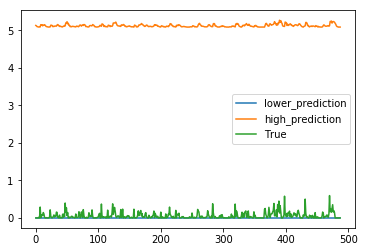

In [87]:
plt.plot(lower, label='lower_prediction')
plt.plot(upper, label='high_prediction')
plt.plot(test_y_, label='True')
plt.legend()
plt.show()